In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

In [61]:
train_data= pd.read_csv(r"D:\Courses\AI ITI\ml1\Machine-Learning-fundamentals\Data sets\house-prices-advanced-regression-techniques\train.csv")

In [62]:
## separating the categorical features and numerical features
num_cols = list(set(train_data.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['Id']))

## Some Visualizations that help us understand the data

### Numerical Features Visuals

In [63]:
len(num_cols)

37

array([[<Axes: title={'center': '3SsnPorch'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'MiscVal'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>],
       [<Axes: title={'center': 'YrSold'}>,
        <Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>, <Axes: >]], dtype=object)

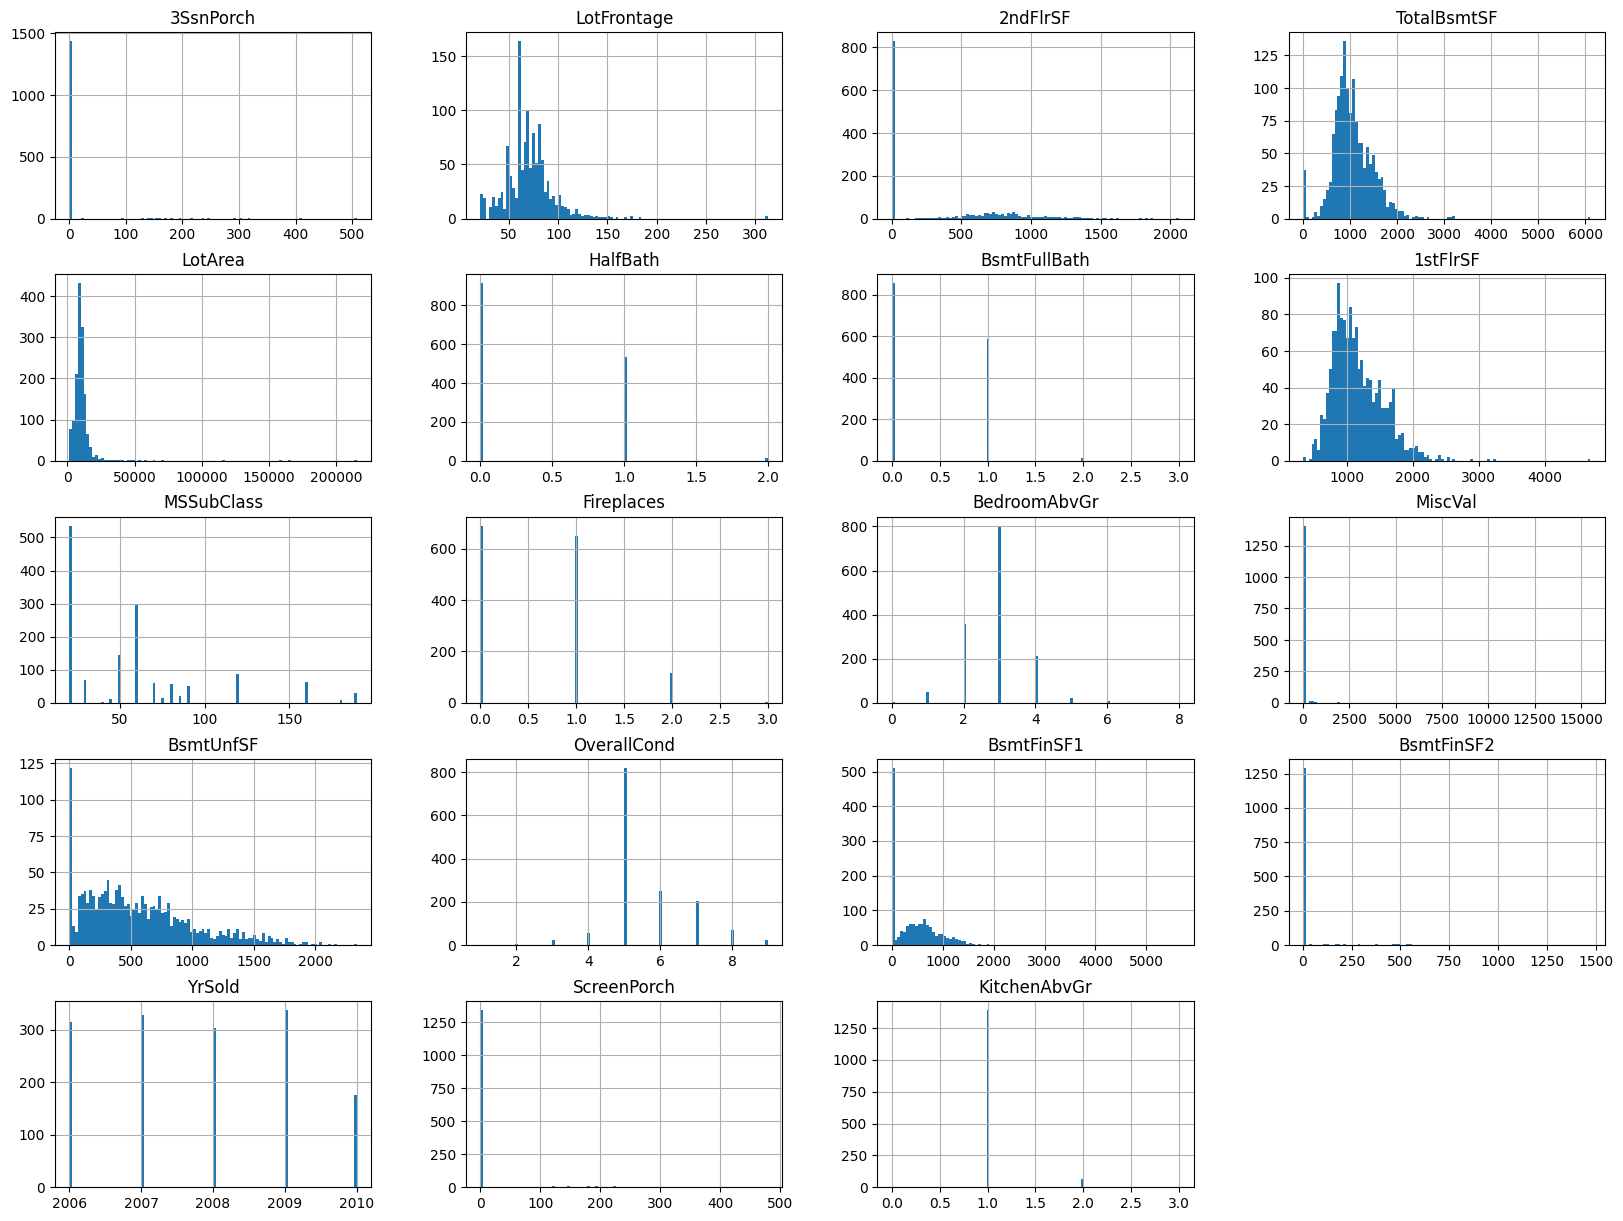

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data[num_cols[:19]].hist(bins = 100, figsize = (20, 15))

array([[<Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'PoolArea'}>],
       [<Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'EnclosedPorch'}>,
        <Axes: title={'center': 'GarageCars'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'MoSold'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'MasVnrArea'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

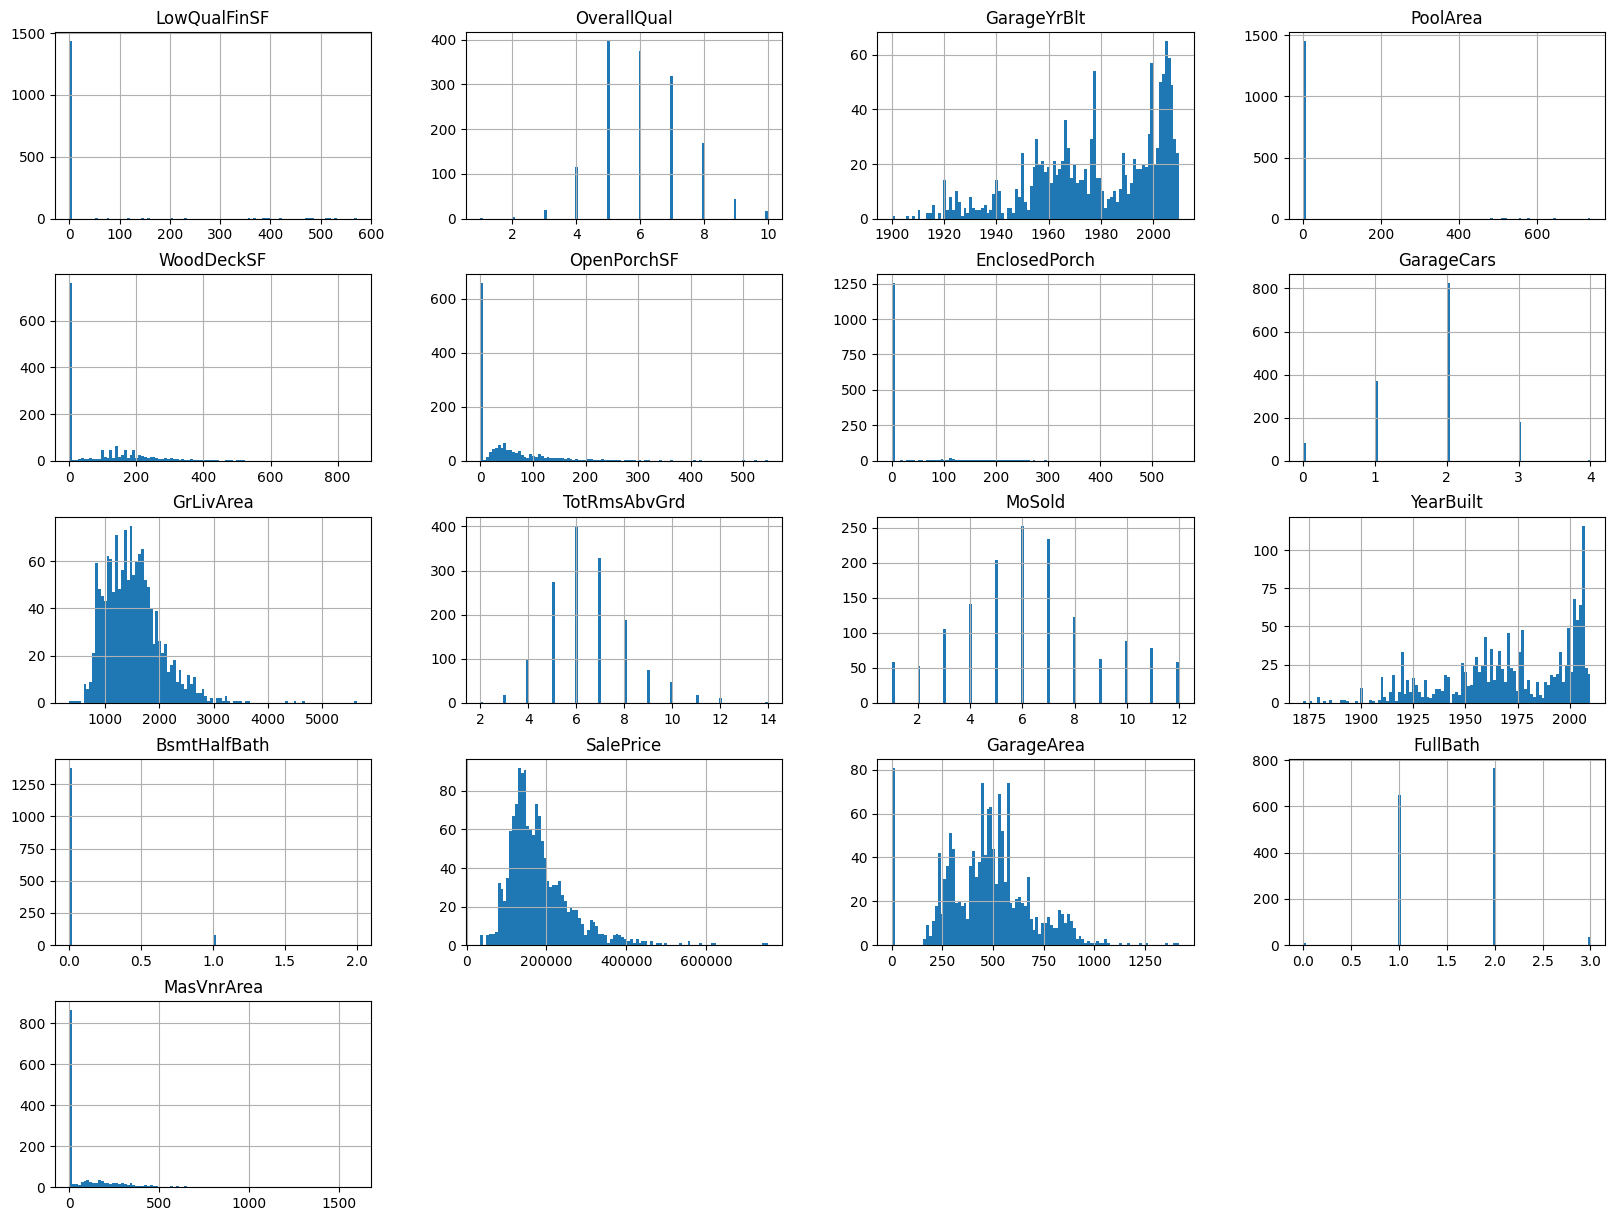

In [65]:
train_data[num_cols[20:]].hist(bins = 100, figsize = (20, 15))

In [66]:
corr_matrix = train_data[num_cols].corr()
# corr_matrix

<Axes: >

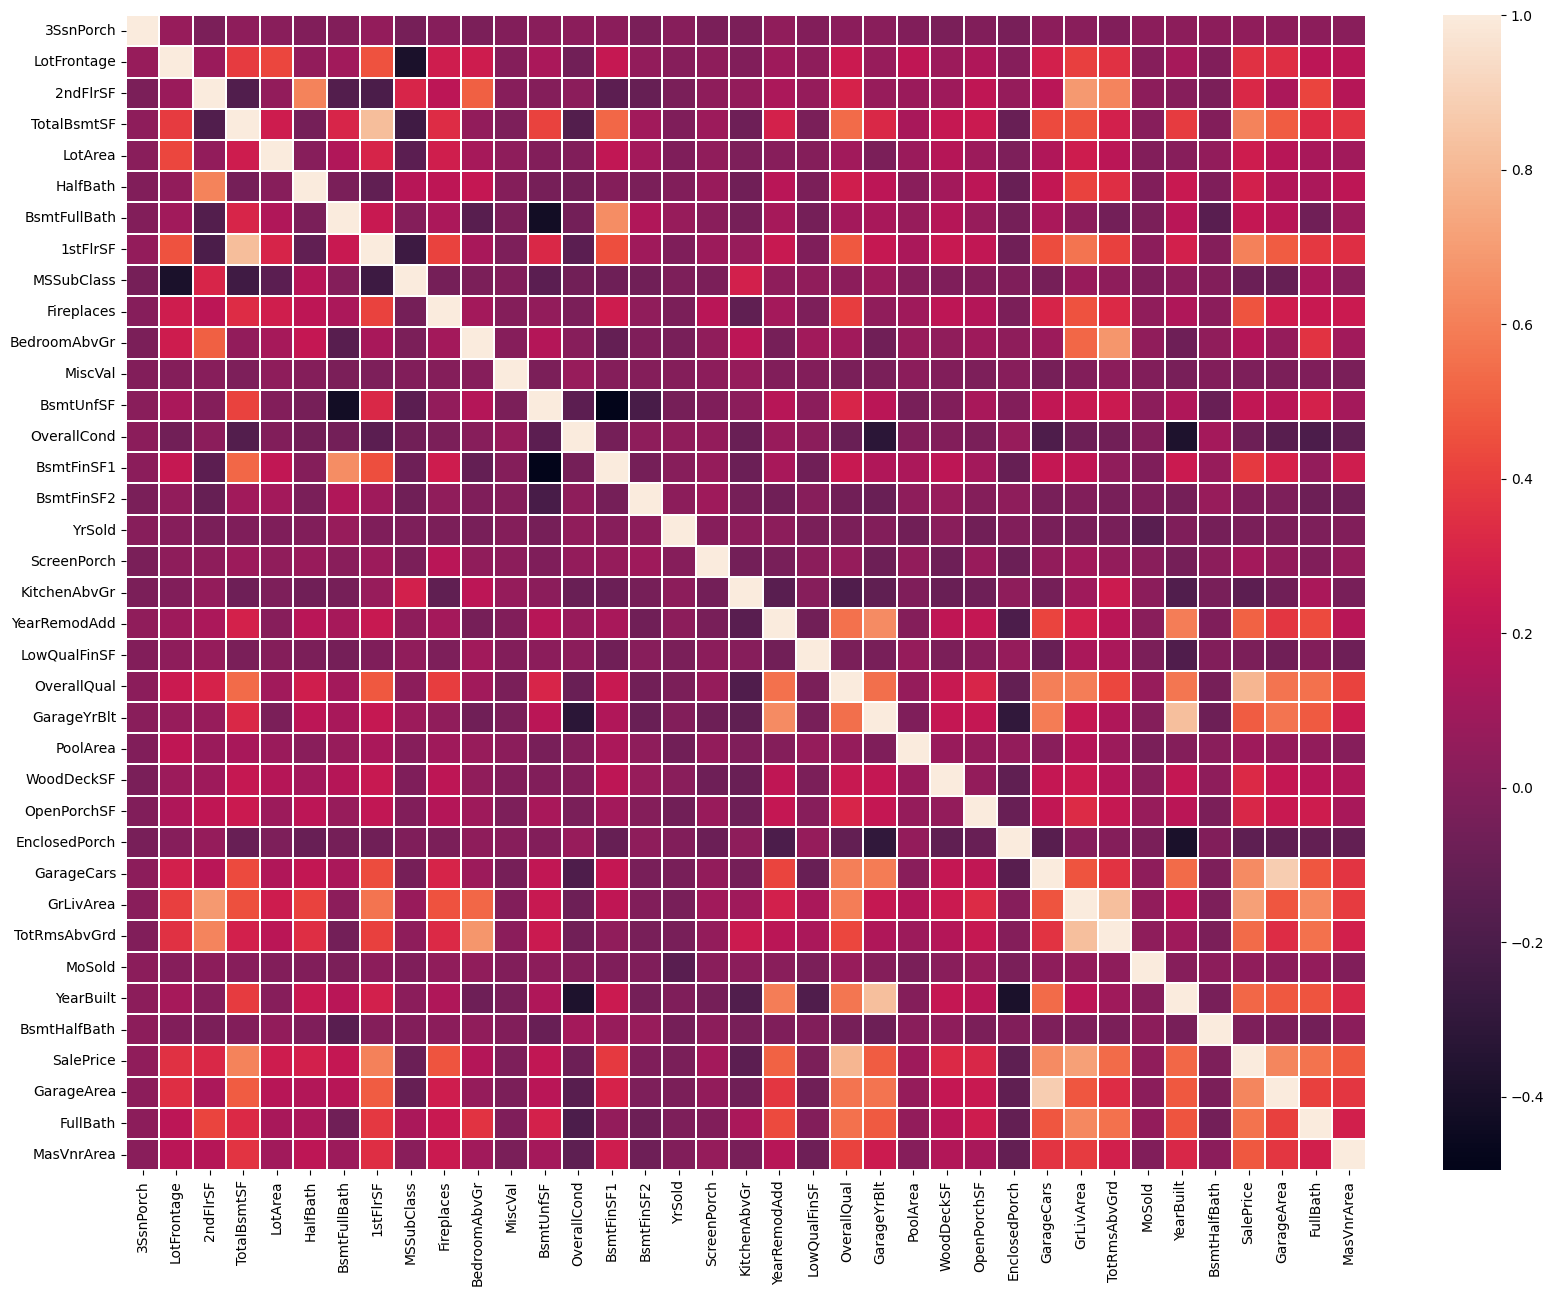

In [67]:
# making a heatmap to inspect the highly correlated features
import seaborn as sns
plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix, 
           xticklabels = corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values, 
           linewidth = 0.1)

### Categorical Variables Visuals

In [68]:
#making dataframes each of them contains the categories of a catgegorical variable and theire frequencies
df_list=[]
for cat_column in cat_cols:
    df_list.append(train_data.groupby([cat_column])['Id'].count().reset_index().rename(columns = {'Id' : 'count'}))

In [69]:
len(df_list)

43

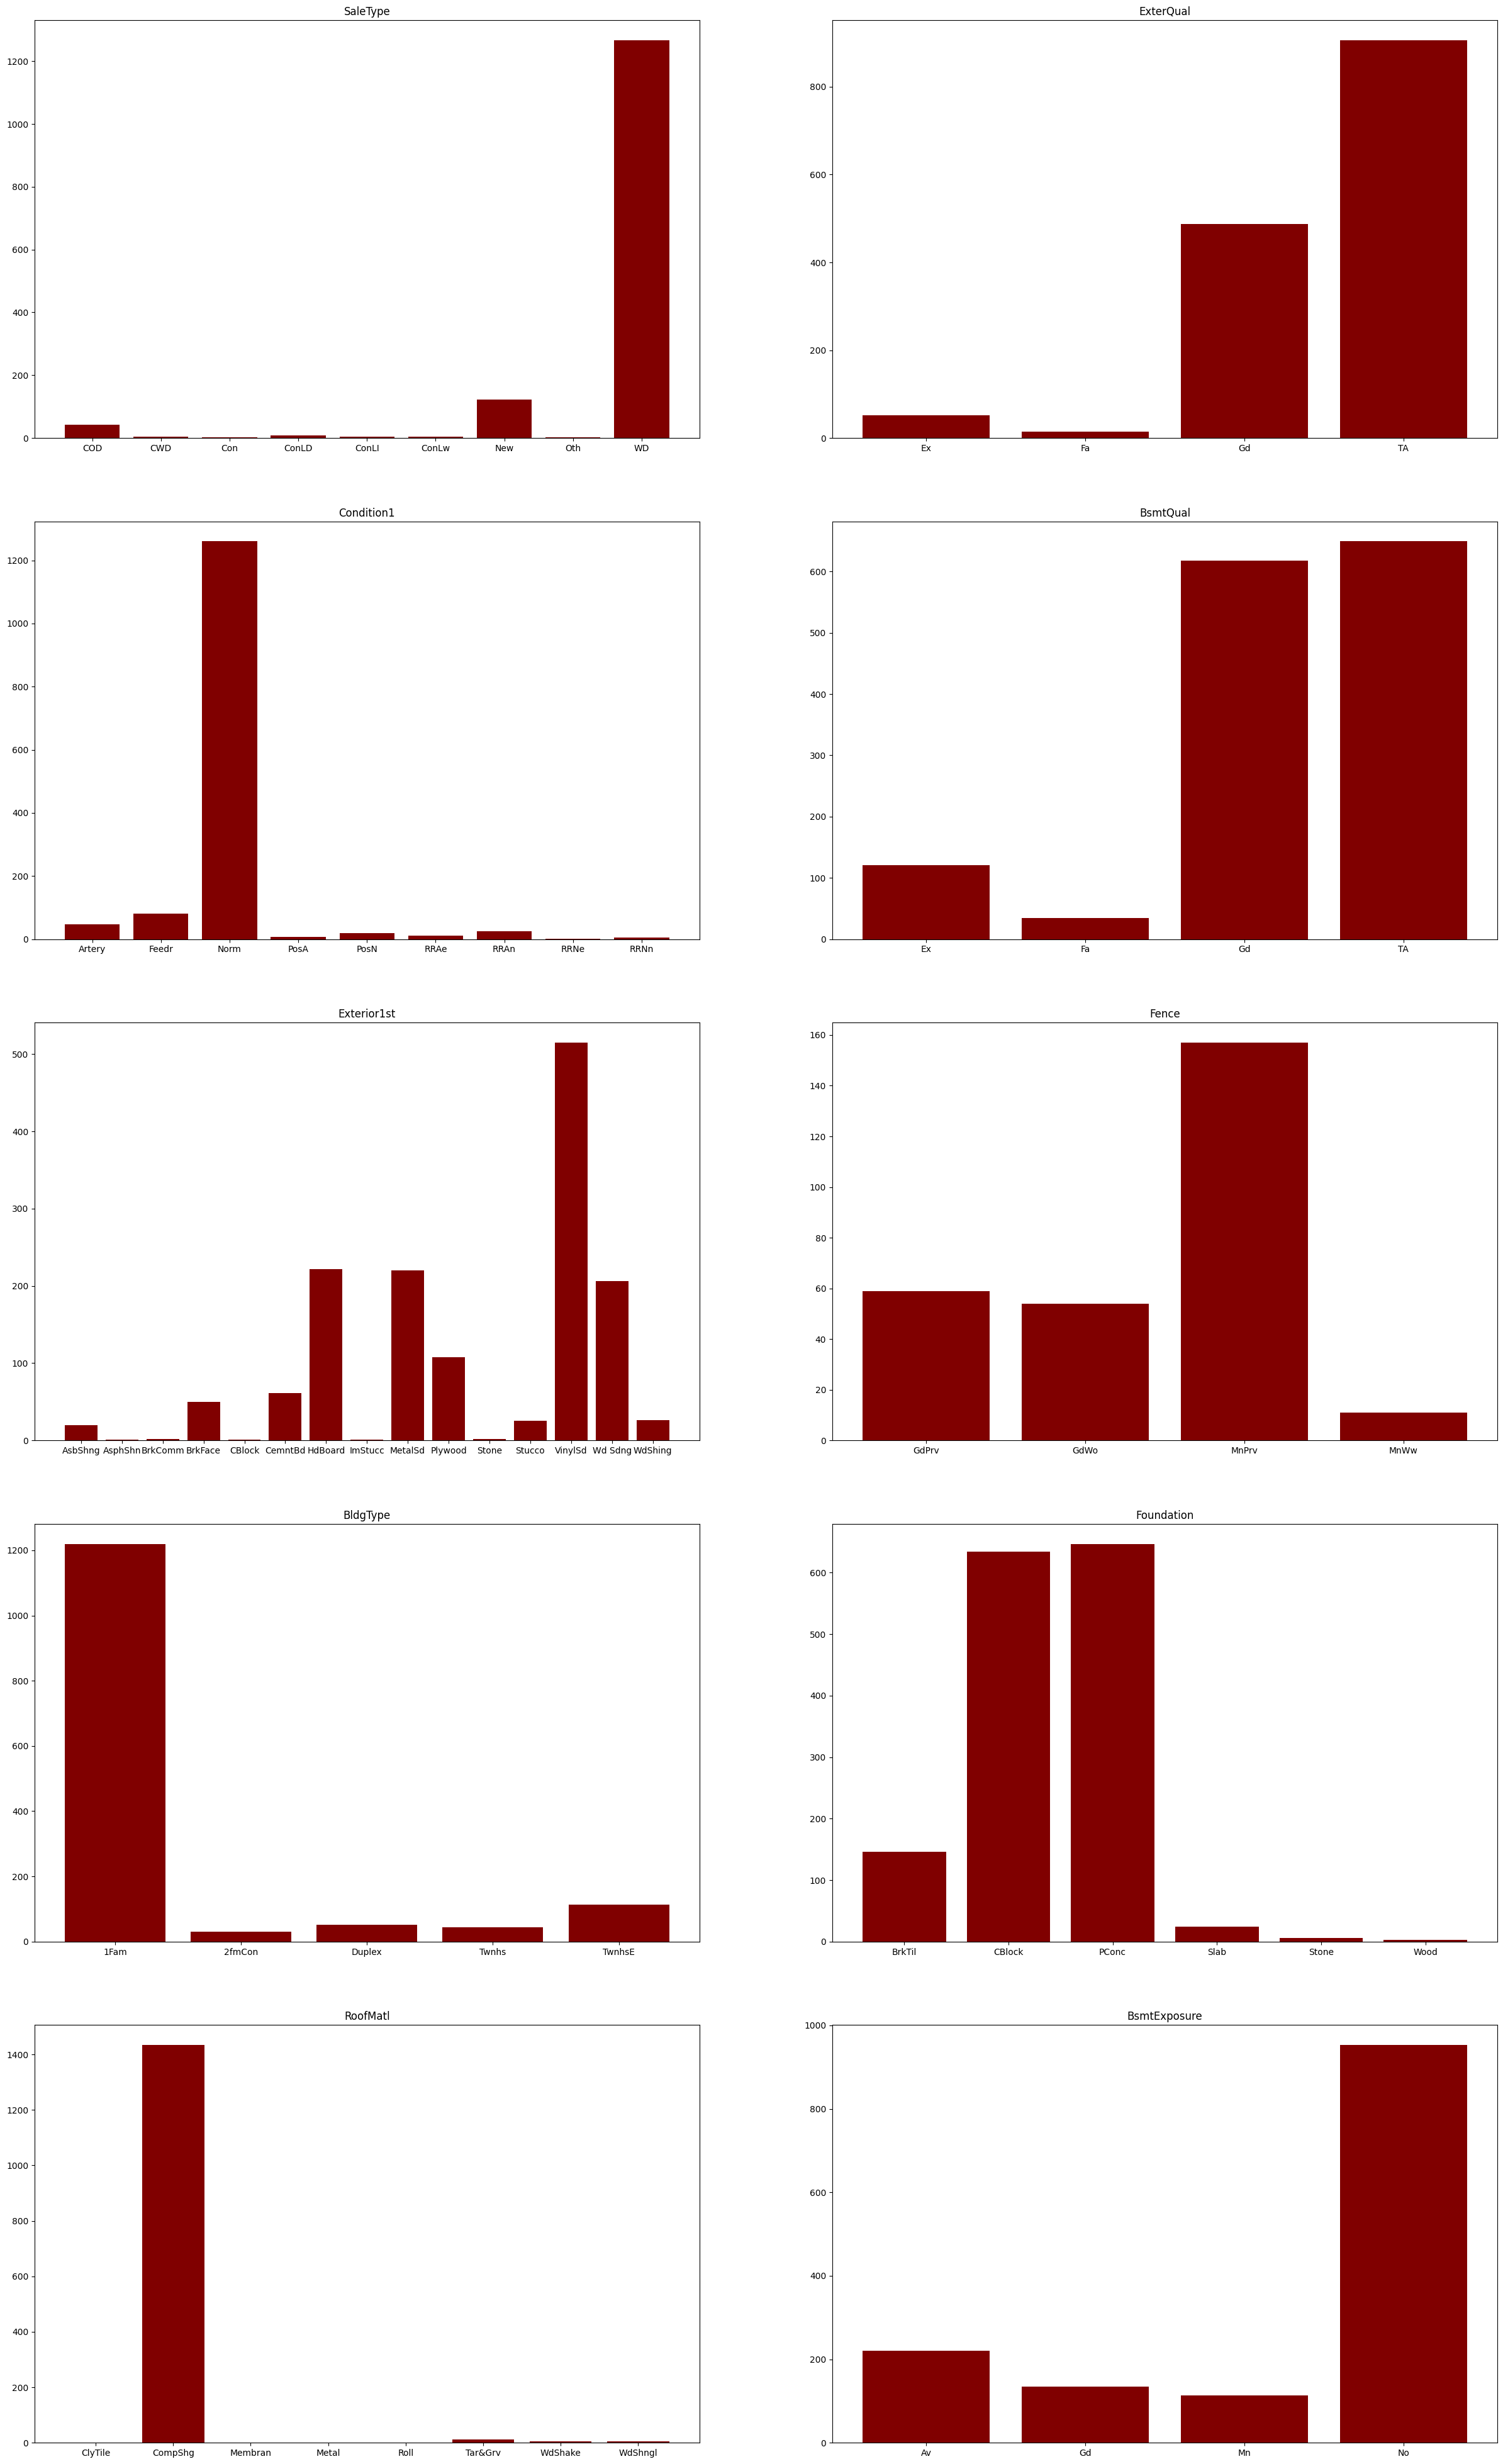

In [70]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 50))
i=0
j=0
for df in df_list[0:10]:
    axes[i, j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[i, j].set_title(df.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

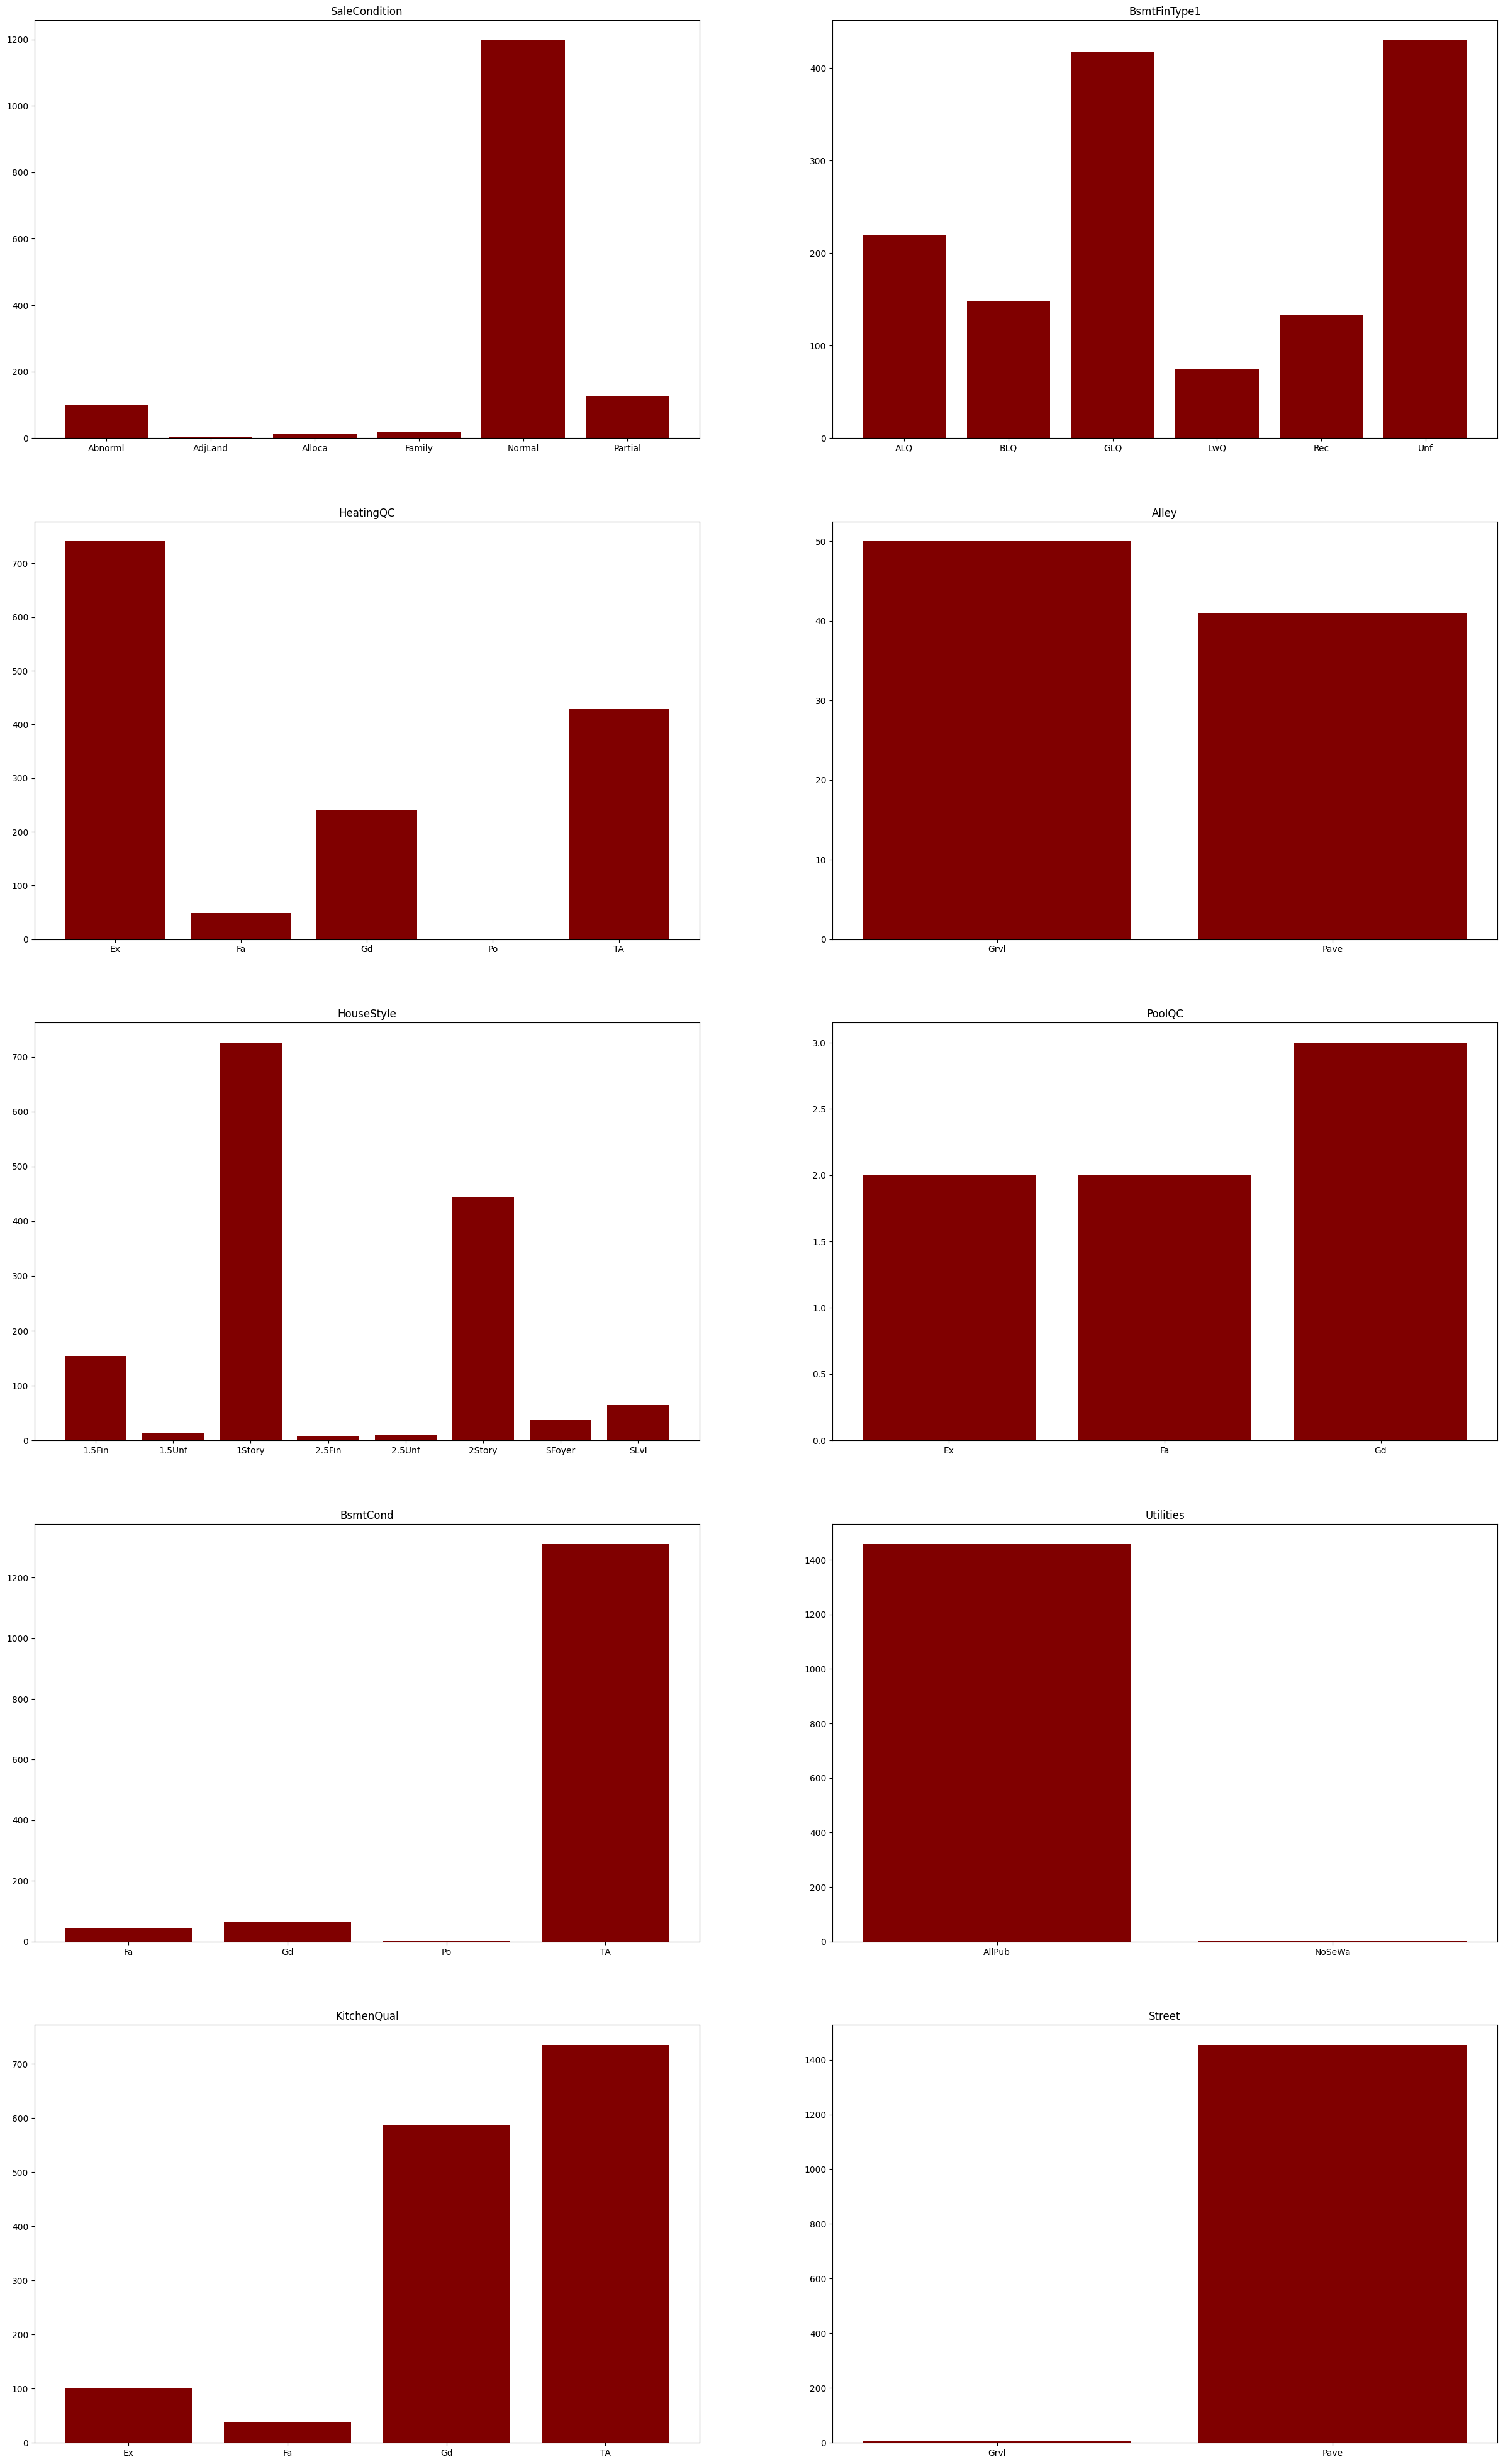

In [71]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 50))
i=0
j=0
for df in df_list[10:20]:
    axes[i, j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[i, j].set_title(df.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

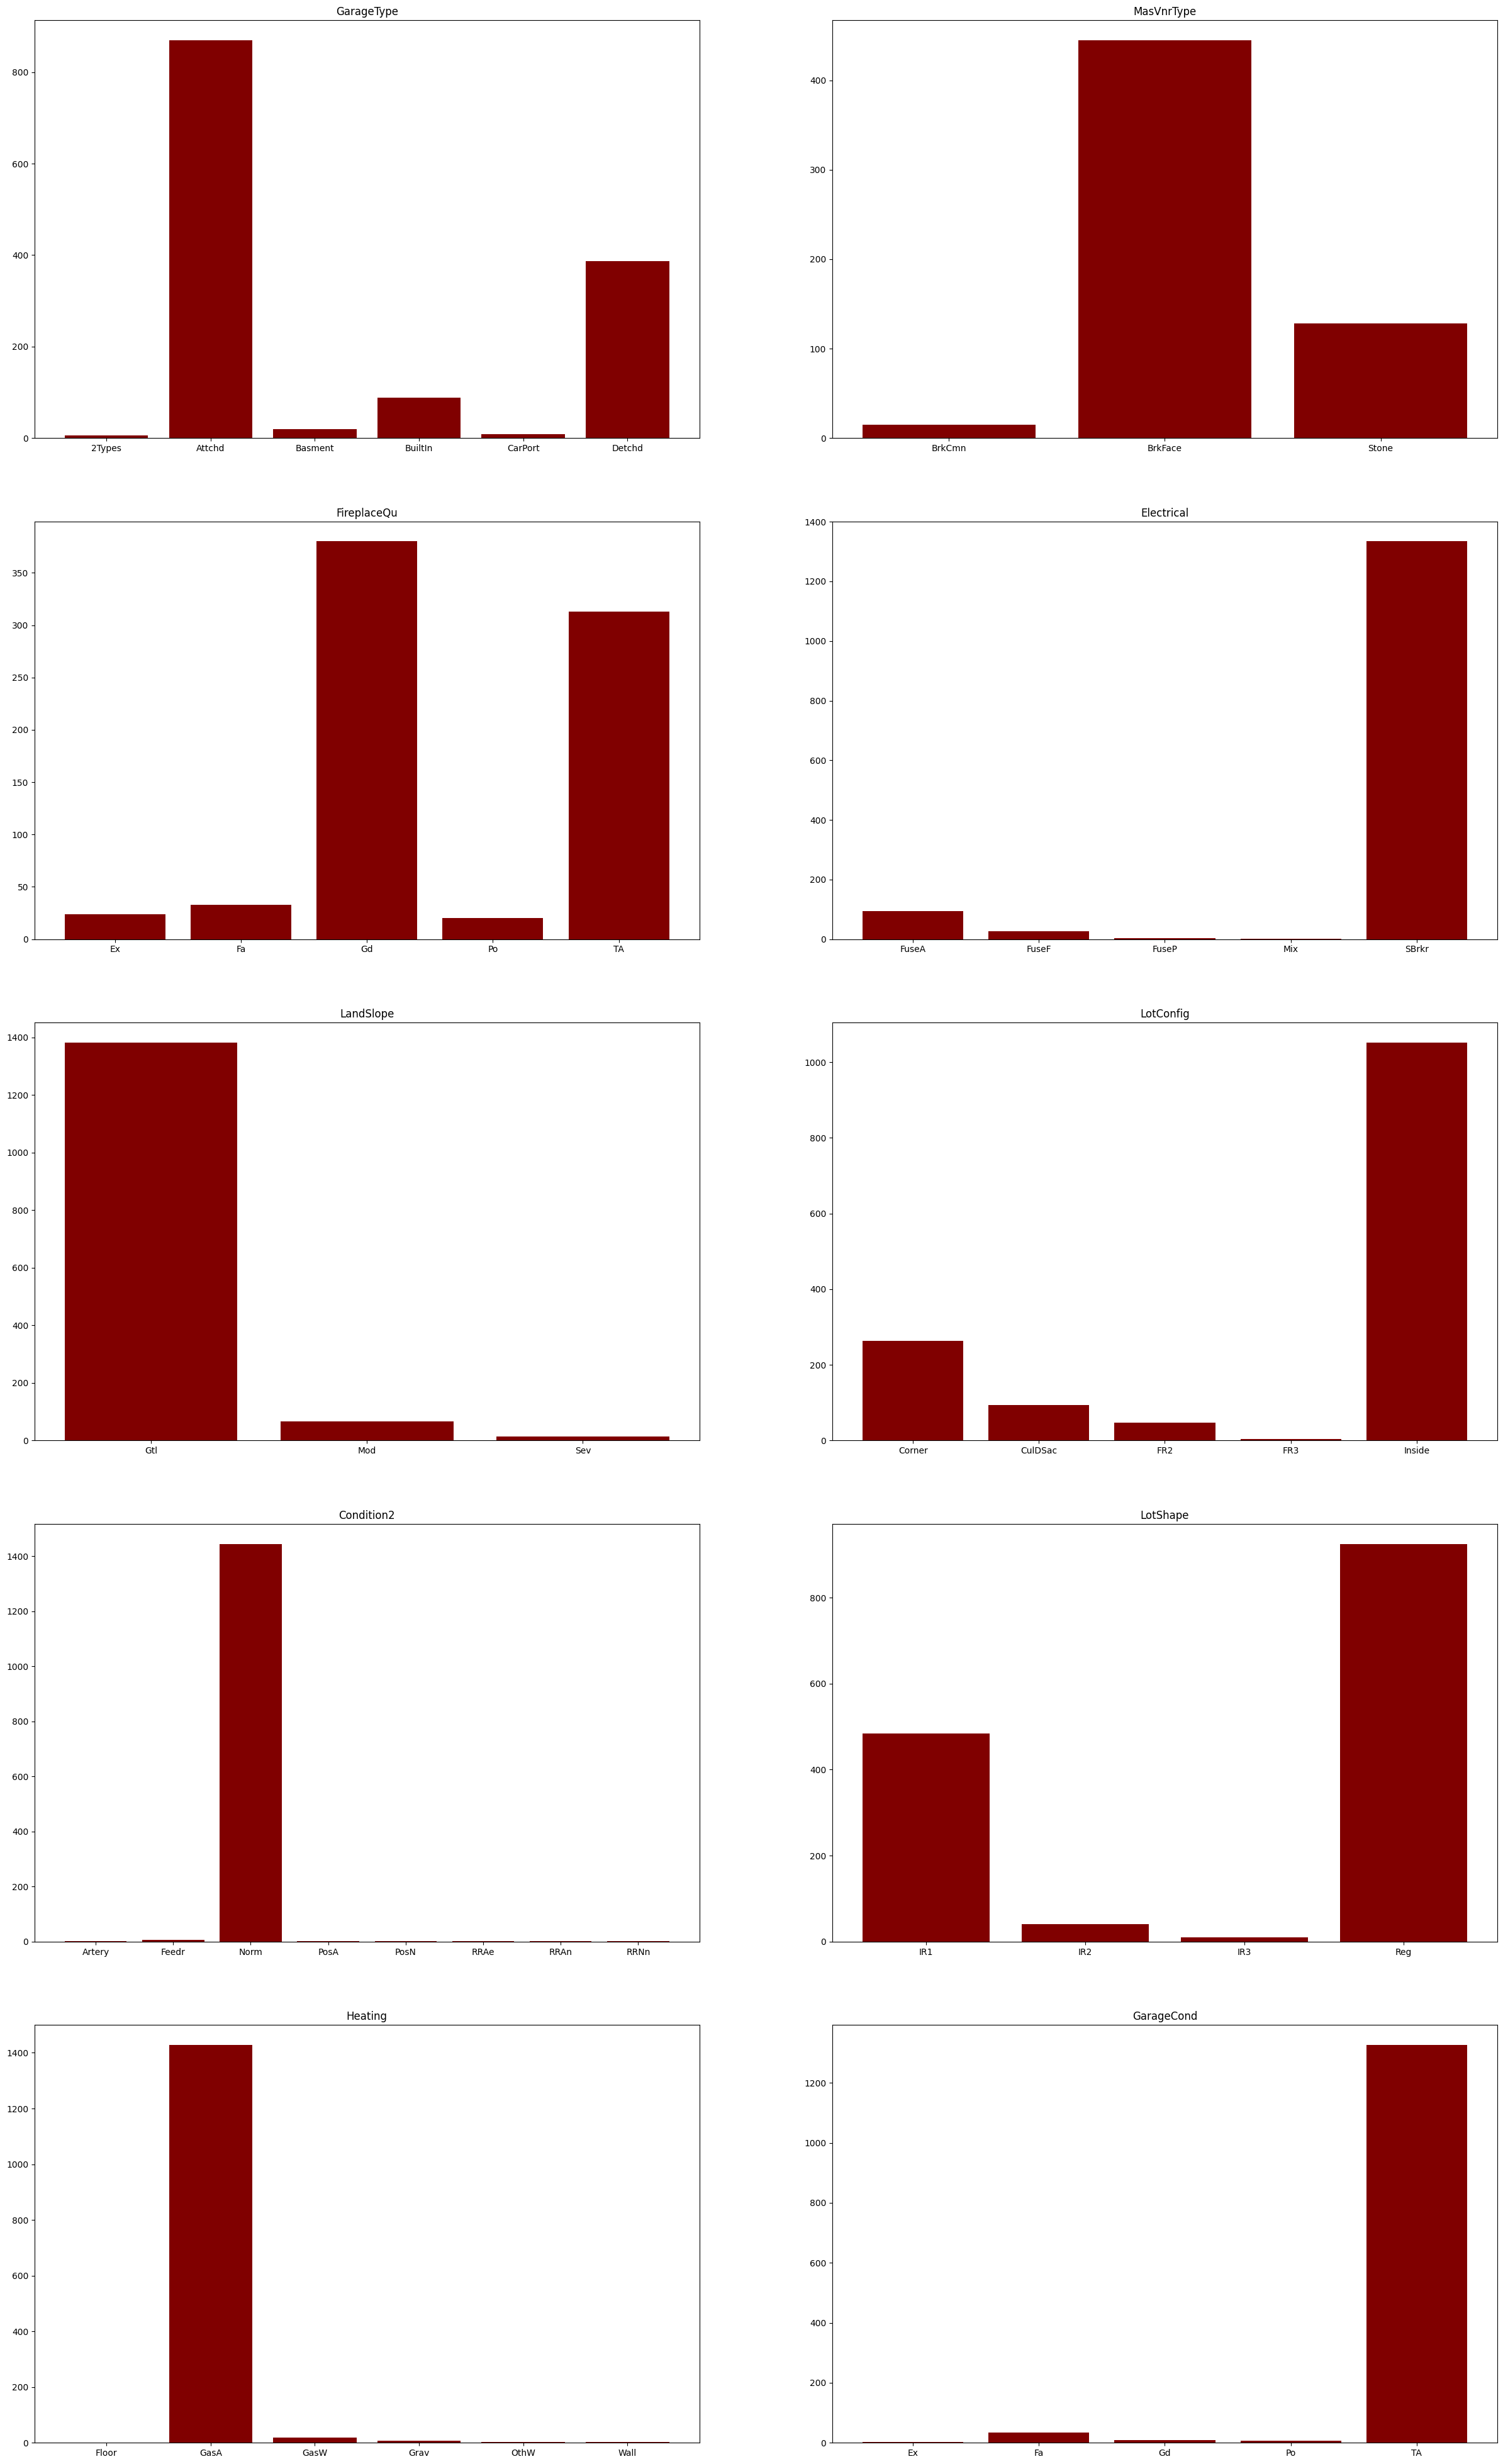

In [72]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 50))
i=0
j=0
for df in df_list[20:30]:
    axes[i, j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[i, j].set_title(df.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

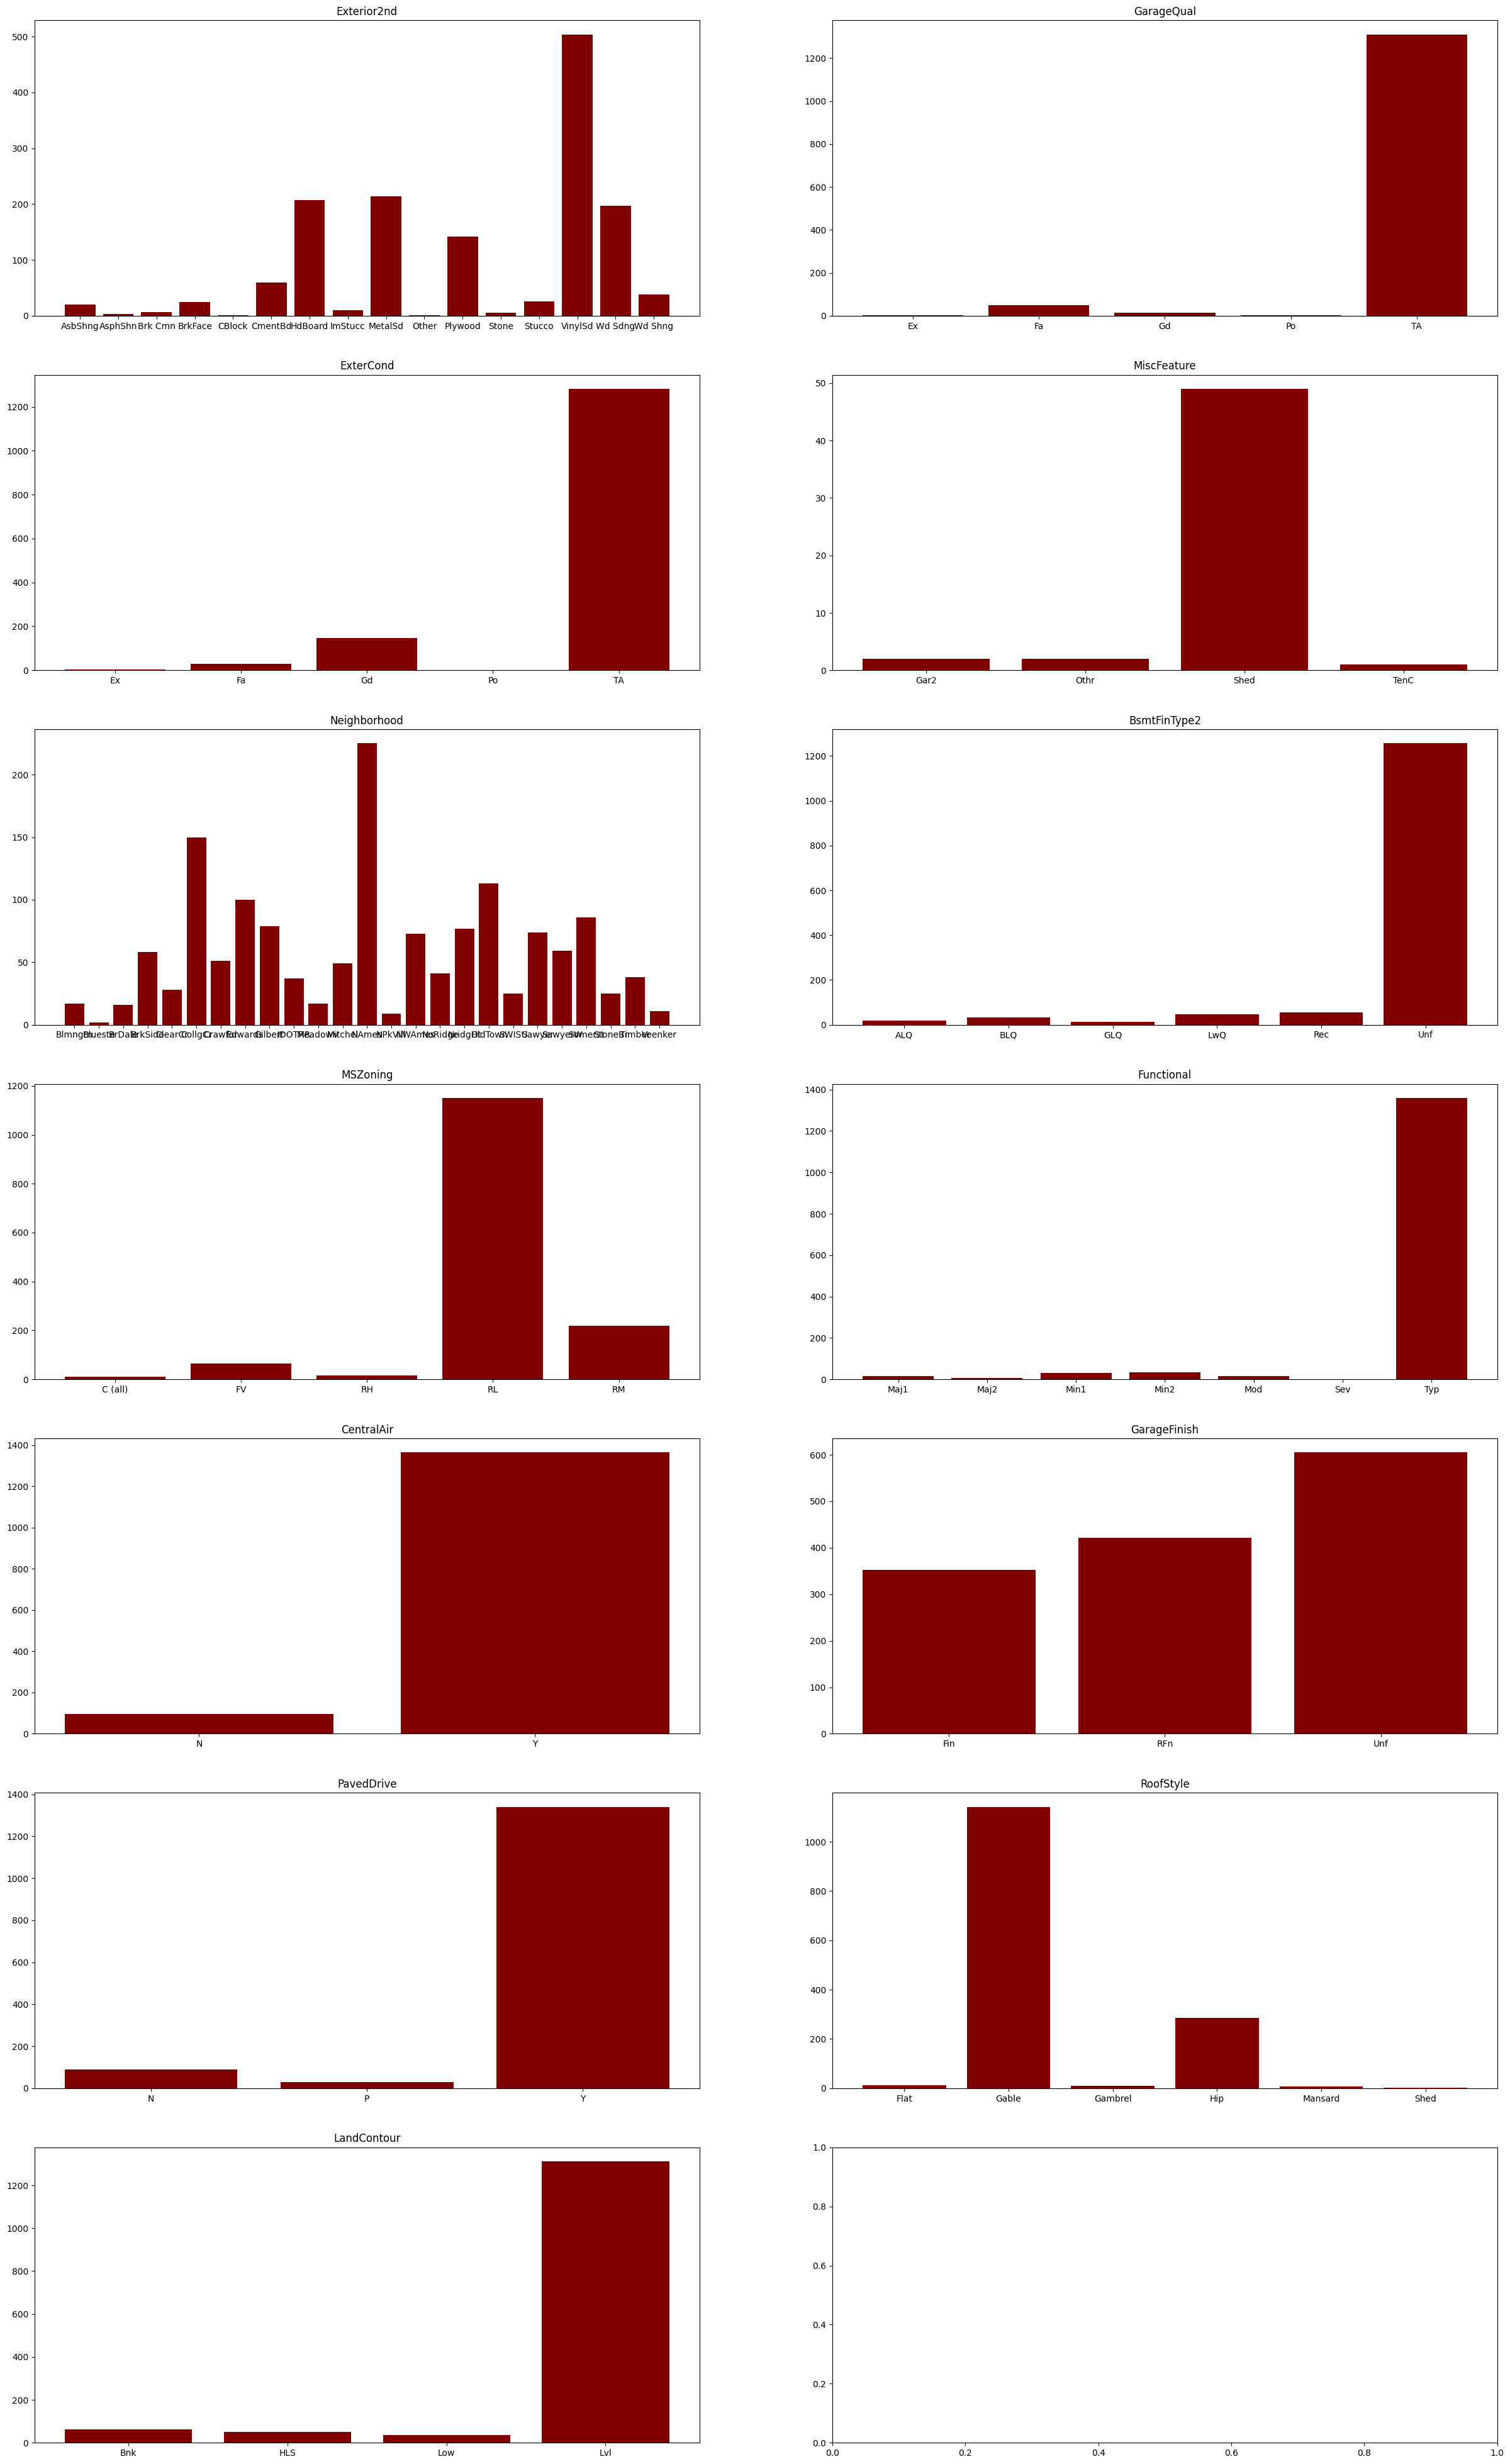

In [73]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(30, 50))
i=0
j=0
for df in df_list[30:]:
    axes[i, j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[i, j].set_title(df.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

## Data Pre-processing 
1- Handling Null Values

2- Dropping Features which have more than 80% of values with the same value

3- removing highly correlated features to avoid multi-collinearity as much as we can

4- removing/clamping outliers

5- transforming highly skewed data to reduce their skewness

6- checking for each features whether it follows a normal distribution or not to decide whether to standardize or min-max scale)

7- classify your categorical features into (ordinal and nominal) to decide which features will be label encoded and which features should be OHE

In [74]:
train_data[num_cols].describe()

,3SsnPorch,LotFrontage,2ndFlrSF,TotalBsmtSF,LotArea,HalfBath,BsmtFullBath,1stFlrSF,MSSubClass,Fireplaces,BedroomAbvGr,MiscVal,BsmtUnfSF,OverallCond,BsmtFinSF1,BsmtFinSF2,YrSold,ScreenPorch,KitchenAbvGr,YearRemodAdd,LowQualFinSF,OverallQual,GarageYrBlt,PoolArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,GarageCars,GrLivArea,TotRmsAbvGrd,MoSold,YearBuilt,BsmtHalfBath,SalePrice,GarageArea,FullBath,MasVnrArea
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000
mean,3.409589,70.049958,346.992466,1057.429452,10516.828082,0.382877,0.425342,1162.626712,56.897260,0.613014,2.866438,43.489041,567.240411,5.575342,443.639726,46.549315,2007.815753,15.060959,1.046575,1984.865753,5.844521,6.099315,1978.506164,2.758904,94.244521,46.660274,21.954110,1.767123,1515.463699,6.517808,6.321918,1971.267808,0.057534,180921.195890,472.980137,1.565068,103.685262
std,29.317331,24.284752,436.528436,438.705324,9981.264932,0.502885,0.518911,386.587738,42.300571,0.644666,0.815778,496.123024,441.866955,1.112799,456.098091,161.319273,1.328095,55.757415,0.220338,20.645407,48.623081,1.382997,24.689725,40.177307,125.338794,66.256028,61.119149,0.747315,525.480383,1.625393,2.703626,30.202904,0.238753,79442.502883,213.804841,0.550916,181.066207
min,0.000000,21.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,334.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2006.000000,0.000000,0.000000,1950.000000,0.000000,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,2.000000,1.000000,1872.000000,0.000000,34900.000000,0.000000,0.000000,0.000000
25%,0.000000,59.000000,0.000000,795.750000,7553.500000,0.000000,0.000000,882.000000,20.000000,0.000000,2.000000,0.000000,223.000000,5.000000,0.000000,0.000000,2007.000000,0.000000,1.000000,1967.000000,0.000000,5.000000,1961.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1129.500000,5.000000,5.000000,1954.000000,0.000000,129975.000000,334.500000,1.000000,0.000000
50%,0.000000,69.000000,0.000000,991.500000,9478.500000,0.000000,0.000000,1087.000000,50.000000,1.000000,3.000000,0.000000,477.500000,5.000000,383.500000,0.000000,2008.000000,0.000000,1.000000,1994.000000,0.000000,6.000000,1980.000000,0.000000,0.000000,25.000000,0.000000,2.000000,1464.000000,6.000000,6.000000,1973.000000,0.000000,163000.000000,480.000000,2.000000,0.000000
75%,0.000000,80.000000,728.000000,1298.250000,11601.500000,1.000000,1.000000,1391.250000,70.000000,1.000000,3.000000,0.000000,808.000000,6.000000,712.250000,0.000000,2009.000000,0.000000,1.000000,2004.000000,0.000000,7.000000,2002.000000,0.000000,168.000000,68.000000,0.000000,2.000000,1776.750000,7.000000,8.000000,2000.000000,0.000000,214000.000000,576.000000,2.000000,166.000000
max,508.000000,313.000000,2065.000000,6110.000000,215245.000000,2.000000,3.000000,4692.000000,190.000000,3.000000,8.000000,15500.000000,2336.000000,9.000000,5644.000000,1474.000000,2010.000000,480.000000,3.000000,2010.000000,572.000000,10.000000,2010.000000,738.000000,857.000000,547.000000,552.000000,4.000000,5642.000000,14.000000,12.000000,2010.000000,2.000000,755000.000000,1418.000000,3.000000,1600.000000


### Handling NULL values

In [75]:
nulls_df = train_data.isna().sum().reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,872
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


In [76]:
# handling NULL Values
## columns which have more than 60% of the data NULL values should be dropped
train_data = train_data.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'])

## when the number of nulls in a row is very small, we can simply drop this small number of rows
train_data = train_data.dropna(axis = 0, subset = ['GarageYrBlt', 'MasVnrArea', 'Electrical', 
                                                   'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
                                                   'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 
                                                   'BsmtQual', 'MasVnrType'])

train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())

In [77]:
nulls_df = train_data.isna().sum().reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count


### Dropping any column which has 80% of values with the same value 

In [78]:
# making dataframes each of them contains the categories of a catgegorical variable and theire frequencies again
## separating the categorical features and numerical features
num_cols = list(set(train_data.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['Id']))

df_list=[]
for cat_column in cat_cols:
    df_list.append(train_data.groupby([cat_column])['Id'].count().reset_index().rename(columns = {'Id' : 'count'}))

def dropping_var_wth_same_value_80_time(count_df, df):
    highest_freq_percentage = (count_df['count']/df.count()[0]).\
                        reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
    if highest_freq_percentage >= 0.8:
        print('we will drop the column ', count_df.columns[0])
        df = df.drop(columns = [count_df.columns[0]])
    return df

df_list = []
for col in list(set(train_data.columns) - set(['Id'])):
  df_list.append(train_data.groupby([col])['Id'].count().reset_index().rename(columns = {'Id' : 'count'}))

In [79]:
for idx in range(len(df_list)):
  train_data = dropping_var_wth_same_value_80_time(df_list[idx], train_data)

we will drop the column  SaleType
we will drop the column  Condition1
we will drop the column  BsmtCond
we will drop the column  ScreenPorch
we will drop the column  Electrical
we will drop the column  GarageCond
we will drop the column  PoolArea
we will drop the column  GarageQual
we will drop the column  MSZoning
we will drop the column  BsmtHalfBath
we will drop the column  Functional
we will drop the column  CentralAir
we will drop the column  3SsnPorch
we will drop the column  LandContour
we will drop the column  BldgType
we will drop the column  RoofMatl
we will drop the column  MiscVal
we will drop the column  Utilities
we will drop the column  BsmtFinSF2
we will drop the column  Street
we will drop the column  KitchenAbvGr
we will drop the column  LandSlope
we will drop the column  Condition2
we will drop the column  LowQualFinSF
we will drop the column  Heating
we will drop the column  EnclosedPorch
we will drop the column  ExterCond
we will drop the column  BsmtFinType2
we wi

C:\Users\M.Ahmed\AppData\Local\Temp\ipykernel_21180\1814665719.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).\
C:\Users\M.Ahmed\AppData\Local\Temp\ipykernel_21180\1814665719.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).\
C:\Users\M.Ahmed\AppData\Local\Temp\ipykernel_21180\1814665719.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value

### If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable)

In [80]:
## separating the categorical features and numerical features again
num_cols = list(set(train_data.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['Id']))

# inspecting the correlation between each couple of features
num_cols_wthout_response_variable = list(set(num_cols) - set(['SalePrice']))
corr_matrix = train_data[num_cols_wthout_response_variable].corr()
corr_matrix

,LotFrontage,2ndFlrSF,TotalBsmtSF,LotArea,OverallQual,GarageYrBlt,HalfBath,BsmtFullBath,WoodDeckSF,OpenPorchSF,1stFlrSF,MSSubClass,Fireplaces,BedroomAbvGr,GarageCars,MoSold,GrLivArea,TotRmsAbvGrd,YearBuilt,BsmtUnfSF,OverallCond,BsmtFinSF1,YrSold,YearRemodAdd,GarageArea,FullBath,MasVnrArea
LotFrontage,1.000000,0.099698,0.484433,0.337400,0.246514,-0.033629,0.047079,0.119961,0.114975,0.207149,0.496415,-0.479308,0.338217,0.299577,0.284767,-0.003627,0.466927,0.399408,-0.021951,0.133709,-0.008430,0.286028,0.019009,-0.013760,0.404191,0.127982,0.203088
2ndFlrSF,0.099698,1.000000,-0.255517,0.105247,0.217821,0.080873,0.714685,-0.163267,0.101414,0.216151,-0.270102,0.240782,0.152148,0.514552,0.189435,0.004776,0.678519,0.593007,0.087094,-0.112562,0.033050,-0.106869,-0.054018,0.084436,0.128450,0.370973,0.311878
TotalBsmtSF,0.484433,-0.255517,1.000000,0.322421,0.533307,0.349217,-0.256008,0.227167,0.219722,0.239830,0.928074,-0.384739,0.302051,0.010130,0.450871,-0.014653,0.482036,0.336493,0.348716,0.405526,-0.251415,0.485472,0.019108,0.290599,0.556284,0.335927,0.275511
LotArea,0.337400,0.105247,0.322421,1.000000,0.119547,-0.089824,0.014427,0.087972,0.171871,0.177458,0.343236,-0.247451,0.299936,0.208104,0.159357,-0.012473,0.354969,0.230136,-0.082259,0.020679,0.056336,0.256028,-0.023233,0.021838,0.235873,0.141459,0.197566
OverallQual,0.246514,0.217821,0.533307,0.119547,1.000000,0.697391,0.109417,0.099876,0.298799,0.270902,0.507918,-0.106754,0.324013,-0.019617,0.636829,0.036968,0.580193,0.442986,0.719520,0.308467,-0.253849,0.207208,0.026498,0.644391,0.586118,0.574870,0.327201
GarageYrBlt,-0.033629,0.080873,0.349217,-0.089824,0.697391,1.000000,-0.021277,0.087780,0.235389,0.219899,0.270418,0.108028,0.000079,-0.202155,0.595823,0.032579,0.277852,0.182910,0.953624,0.291930,-0.377727,0.074766,0.000901,0.838024,0.510636,0.563453,0.075426
HalfBath,0.047079,0.714685,-0.256008,0.014427,0.109417,-0.021277,1.000000,-0.132934,0.065435,0.163468,-0.266576,0.178668,0.162393,0.332095,0.100743,-0.020292,0.428821,0.371059,-0.015224,-0.147310,0.055896,-0.079046,-0.005479,-0.023193,0.058615,0.013570,0.252510
BsmtFullBath,0.119961,-0.163267,0.227167,0.087972,0.099876,0.087780,-0.132934,1.000000,0.104674,0.045905,0.210921,-0.067276,0.125766,-0.196701,0.122577,-0.017851,0.016495,-0.052619,0.104000,-0.490113,-0.058818,0.659555,0.120289,0.088861,0.189897,-0.095767,0.018123
WoodDeckSF,0.114975,0.101414,0.219722,0.171871,0.298799,0.235389,0.065435,0.104674,1.000000,0.045513,0.248629,-0.068938,0.205611,0.038403,0.213231,-0.000670,0.279399,0.183936,0.239962,0.041880,-0.005307,0.150537,-0.032499,0.237196,0.208839,0.230950,0.138408
OpenPorchSF,0.207149,0.216151,0.239830,0.177458,0.270902,0.219899,0.163468,0.045905,0.045513,1.000000,0.232040,-0.082245,0.146913,0.117227,0.238349,0.100334,0.368237,0.270776,0.225299,0.072559,-0.040609,0.131486,-0.046209,0.217607,0.273435,0.301053,0.113087


In [81]:
columns_to_drop = []

for row_idx in range(corr_matrix.values.shape[0]):
    for col_idx in range(row_idx + 1, corr_matrix.values.shape[0]):
        if np.abs(corr_matrix.values[row_idx, col_idx]) > 0.7:
            var_row_corr_wth_response = np.abs(np.corrcoef(train_data['SalePrice'], 
                                                           train_data[num_cols_wthout_response_variable[row_idx]])[0, 1])
            var_col_corr_wth_response = np.abs(np.corrcoef(train_data['SalePrice'], 
                                                           train_data[num_cols_wthout_response_variable[col_idx]])[0, 1])
            
            if var_row_corr_wth_response > var_col_corr_wth_response:
                print('we will drop the column ', num_cols_wthout_response_variable[col_idx])
                columns_to_drop.append(num_cols_wthout_response_variable[col_idx])
            else:
                print('we will drop the column ', num_cols_wthout_response_variable[row_idx])
                columns_to_drop.append(num_cols_wthout_response_variable[row_idx])

# Drop columns after the loop to avoid KeyError
train_data = train_data.drop(columns=set(columns_to_drop))

we will drop the column  HalfBath
we will drop the column  TotalBsmtSF
we will drop the column  YearBuilt
we will drop the column  GarageYrBlt
we will drop the column  YearRemodAdd
we will drop the column  GarageArea
we will drop the column  TotRmsAbvGrd
we will drop the column  YearRemodAdd


In [82]:
## separating the categorical features and numerical features again
num_cols = list(set(train_data.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['Id']))

### Calmp Outliers and log-transform any highly skewed variable

In [83]:
# IQR method to clamp outliers
def outliers_clamping(col, value):
    Q1 = np.percentile(train_data[col], q = 25, interpolation = 'midpoint')
    Q3 = np.percentile(train_data[col], q = 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    Upper_Bound = Q3 + 5*IQR
    Lower_Bound = Q1 - 5*IQR
    if value > Upper_Bound:
        return Upper_Bound
    else:
        return value
    
def skewness_calc(col ,df):
    std_col = np.std(df[col])
    mean_col = np.mean(df[col])
    size_rows = df.count()[0]
    df['diff_col'] = df[col] - mean_col
    df['diff_col_powered'] = np.power(df['diff_col'], 3)
    skewness = np.sum(df['diff_col_powered'])/((size_rows - 1) * np.power(std_col, 3))
    df = df.drop(columns = ['diff_col_powered', 'diff_col'])
    return skewness

def skewed_data_transformation(value, skewness):
    if (skewness >= 1 or skewness <= -1) and value >= 0:
        return np.log(1+ value)
    else:
        return value

In [84]:
## separating the categorical features and numerical features again
num_cols = list(set(train_data.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['Id']))

for col in num_cols:
  train_data[col] = train_data[col].apply(lambda x: outliers_clamping(col, x))

for col in num_cols:
  sk = skewness_calc(col, train_data)
  train_data[col] = train_data[col].apply(lambda x: skewed_data_transformation(x, sk))

C:\Users\M.Ahmed\AppData\Local\Temp\ipykernel_21180\450786150.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  train_data[col] = train_data[col].apply(lambda x: outliers_clamping(col, x))
C:\Users\M.Ahmed\AppData\Local\Temp\ipykernel_21180\3996018877.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  size_rows = df.count()[0]
C:\Users\M.Ahmed\AppData\Local\Temp\ipykernel_21180\3996018877.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value 

In [85]:
train_data[num_cols].describe()

,LotFrontage,2ndFlrSF,LotArea,OverallQual,BsmtFullBath,WoodDeckSF,OpenPorchSF,1stFlrSF,MSSubClass,Fireplaces,BedroomAbvGr,GarageCars,GrLivArea,MoSold,BsmtUnfSF,OverallCond,BsmtFinSF1,YrSold,SalePrice,FullBath,MasVnrArea
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,74.066335,360.438261,9.130925,6.779130,0.500870,117.946087,2.899013,1315.129565,3.820758,0.777391,1.302943,2.126957,7.378968,6.373913,637.311304,1.843110,4.900291,2007.817391,12.221532,1.747826,5.232099
std,20.868869,476.092233,0.526932,1.284421,0.510772,124.558043,2.015032,404.150045,0.723479,0.626792,0.165358,0.624321,0.298907,2.806354,500.544458,0.125047,2.790254,1.321114,0.369531,0.511939,0.875216
min,21.000000,0.000000,7.427144,4.000000,0.000000,0.000000,0.000000,483.000000,3.044522,0.000000,0.693147,1.000000,6.617403,1.000000,0.000000,1.098612,0.000000,2006.000000,11.225257,0.000000,0.000000
25%,68.000000,0.000000,9.014929,6.000000,0.000000,0.000000,0.000000,1044.500000,3.044522,0.000000,1.386294,2.000000,7.187656,5.000000,282.000000,1.791759,3.218876,2007.000000,11.957297,1.000000,4.731793
50%,74.342857,0.000000,9.227787,7.000000,0.000000,120.000000,3.761200,1284.000000,4.110874,1.000000,1.386294,2.000000,7.392032,6.000000,468.000000,1.791759,6.329721,2008.000000,12.173038,2.000000,5.313206
75%,84.000000,794.000000,9.402695,8.000000,1.000000,192.000000,4.418841,1572.000000,4.394449,1.000000,1.386294,3.000000,7.569927,8.000000,925.500000,1.868835,6.805723,2009.000000,12.469209,2.000000,5.814126
max,164.000000,1872.000000,10.360944,10.000000,2.000000,668.000000,6.008813,4209.500000,5.252273,3.000000,1.386294,4.000000,8.520986,12.000000,2336.000000,2.197225,8.574140,2010.000000,13.534474,3.000000,7.274133


### Checking if the variable follows a normal distribution (will be standardized) or does not follow a normal distribution (will be min-max scaled)

In [86]:
## separating the categorical features and numerical features again
num_cols = list(set(train_data.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['Id']))

len(num_cols)

23

#### 1st method to check if a variable follows normal distribution (quantile-quantile plot)

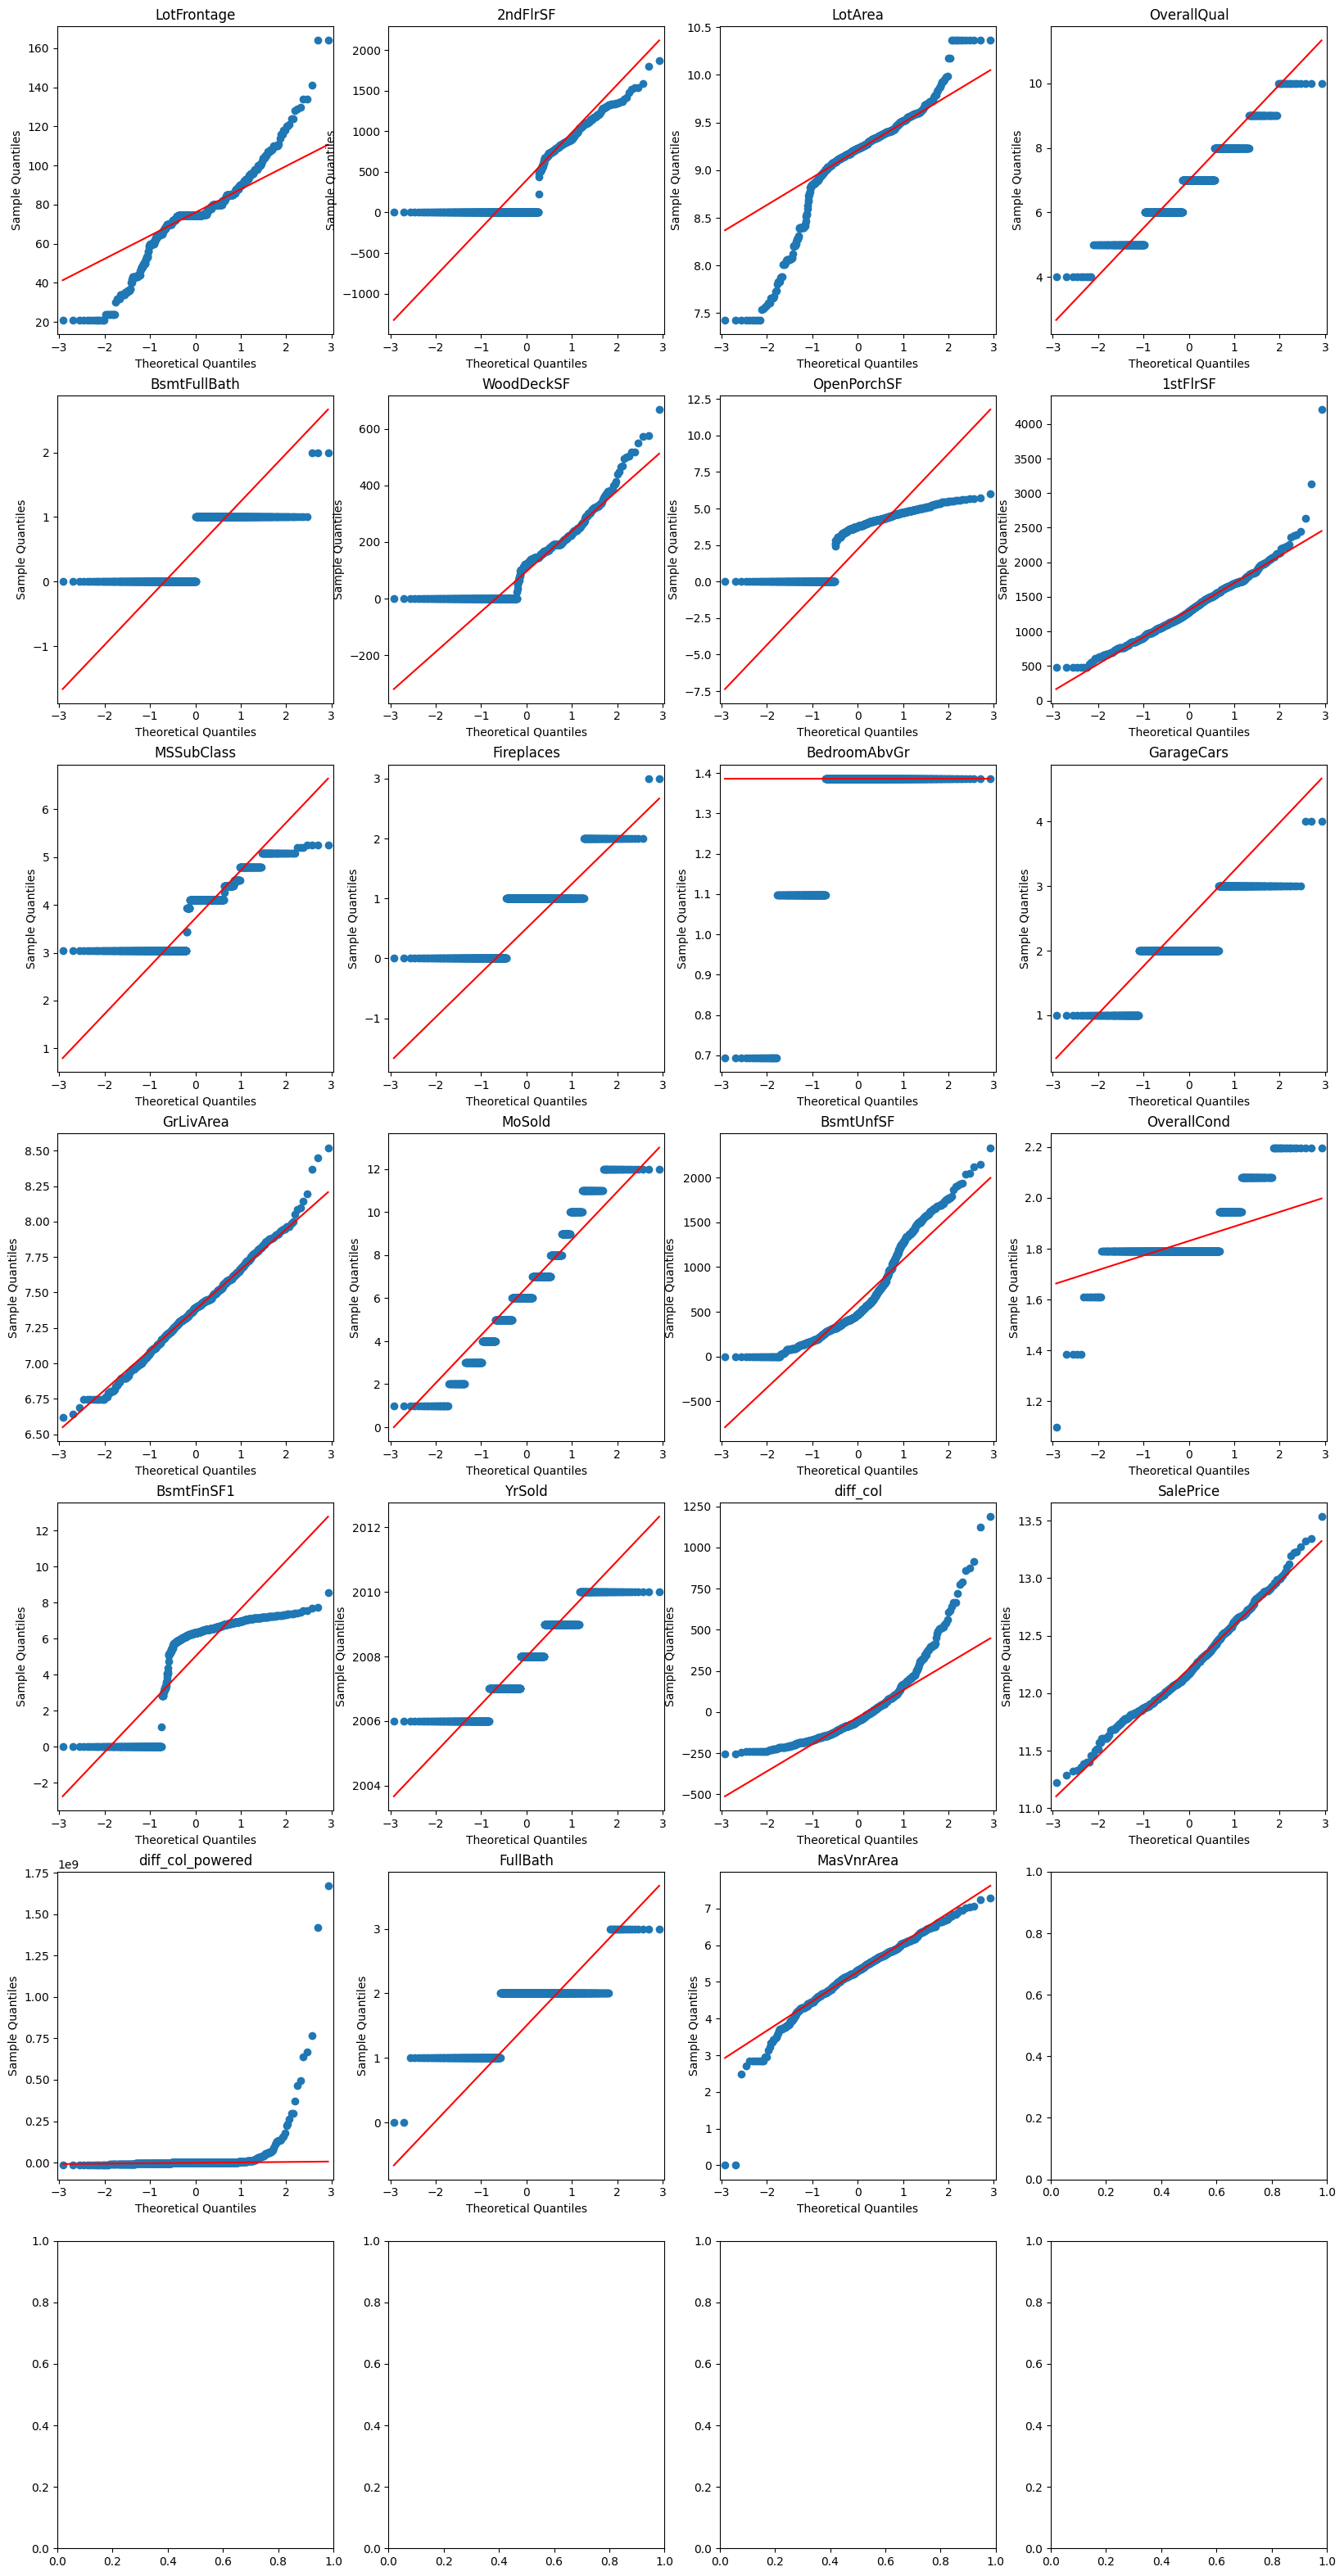

In [87]:
import statsmodels.api as sm
ncols = 4
nrows=7
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 40))
i=0
j=0
for col in num_cols:
    sm.qqplot(train_data[col],fit = False, line='q', ax = axes[i, j])
    axes[i, j].set_title(col)
    if(j<ncols-1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

#### 2nd method to check if a variable follows normal distribution using (Shapiro-Wilk) test

In [88]:
""" Testing the normally distributed features using Shapiro-Wilk test
 the null hypothesis here is that the data follows a normal distribution
 we reject the null hypothesis (aka: data is not normally distributed) if the p-value is less than alpha (typically 5%)
 and we fail to reject the null hypothesis (aka: data is normally distributes) if the p-value is greater than alpha """
feats_std_scale = []
feats_min_max_scale = []
from scipy.stats import shapiro
for col in num_cols:
    stat, p = shapiro(train_data[col])
    print('W_Statistic=%.3f, p=%.8f' % (stat, p))

    alpha = 0.001
    if p > alpha:
        print(f'{col} looks like gaussian (fail to reject H0)')
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)')
        feats_min_max_scale.append(col)

W_Statistic=0.930, p=0.00000000
LotFrontage does not look Gaussian (reject H0)
W_Statistic=0.737, p=0.00000000
2ndFlrSF does not look Gaussian (reject H0)
W_Statistic=0.877, p=0.00000000
LotArea does not look Gaussian (reject H0)
W_Statistic=0.938, p=0.00000000
OverallQual does not look Gaussian (reject H0)
W_Statistic=0.658, p=0.00000000
BsmtFullBath does not look Gaussian (reject H0)
W_Statistic=0.849, p=0.00000000
WoodDeckSF does not look Gaussian (reject H0)
W_Statistic=0.792, p=0.00000000
OpenPorchSF does not look Gaussian (reject H0)
W_Statistic=0.956, p=0.00000000
1stFlrSF does not look Gaussian (reject H0)
W_Statistic=0.827, p=0.00000000
MSSubClass does not look Gaussian (reject H0)
W_Statistic=0.774, p=0.00000000
Fireplaces does not look Gaussian (reject H0)
W_Statistic=0.541, p=0.00000000
BedroomAbvGr does not look Gaussian (reject H0)
W_Statistic=0.785, p=0.00000000
GarageCars does not look Gaussian (reject H0)
W_Statistic=0.994, p=0.01977608
GrLivArea looks like gaussian (f

### Min-max Scaling / Standardizing Numerical Features

In [89]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
min_max_scaled_data = pd.DataFrame(min_max_scaler_model.transform(train_data[feats_min_max_scale]), columns = feats_min_max_scale)

std_scaler = StandardScaler()
std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
std_scaled_data =pd.DataFrame( std_scaler_model.transform(train_data[feats_std_scale]), columns = feats_std_scale)

num_train_df = std_scaled_data.merge(min_max_scaled_data, right_index = True, left_index = True)
num_train_df

,GrLivArea,LotFrontage,2ndFlrSF,LotArea,OverallQual,BsmtFullBath,WoodDeckSF,OpenPorchSF,1stFlrSF,MSSubClass,Fireplaces,BedroomAbvGr,GarageCars,MoSold,BsmtUnfSF,OverallCond,BsmtFinSF1,YrSold,diff_col,SalePrice,diff_col_powered,FullBath,MasVnrArea
0,0.220544,0.307692,0.456197,0.550445,0.500000,0.5,0.000000,0.686847,0.100094,0.483003,0.000000,1.000000,0.333333,0.090909,0.064212,0.630930,0.765211,0.50,0.135969,0.442766,0.009692,0.666667,0.726300
1,0.366068,0.328671,0.462607,0.647988,0.500000,0.5,0.000000,0.625947,0.117268,0.483003,0.333333,1.000000,0.333333,0.727273,0.185788,0.630930,0.721736,0.50,0.112383,0.472850,0.009338,0.666667,0.700255
2,1.060748,0.440559,0.562500,0.728795,0.666667,0.5,0.287425,0.739356,0.177647,0.483003,0.333333,1.000000,0.666667,1.000000,0.209760,0.630930,0.756479,0.50,0.242803,0.521373,0.010323,0.666667,0.805702
3,0.189084,0.377622,0.000000,0.610696,0.666667,0.5,0.381737,0.675748,0.324970,0.000000,0.333333,1.000000,0.333333,0.636364,0.135702,0.630930,0.842366,0.25,0.129032,0.610315,0.009619,0.666667,0.719138
4,0.892120,0.373027,0.525107,0.620622,0.500000,0.5,0.351796,0.885867,0.167449,0.483003,0.666667,1.000000,0.333333,0.909091,0.092466,0.771244,0.788059,0.75,0.166493,0.424742,0.009811,0.666667,0.754014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,-0.998169,0.373027,0.000000,0.935371,0.166667,0.0,0.390719,0.613911,0.189186,0.000000,0.000000,1.000000,0.000000,0.272727,0.254709,0.892789,0.744900,1.00,0.131113,0.322389,0.009644,0.333333,0.721326
571,0.892120,0.412587,0.464744,0.607845,0.666667,0.5,0.000000,0.697252,0.197773,0.483003,0.333333,1.000000,0.333333,1.000000,0.060360,0.630930,0.814626,0.25,0.303850,0.503695,0.013452,0.666667,0.836457
572,-0.048289,0.398601,0.000000,0.581716,0.666667,0.0,0.000000,0.600937,0.293841,0.000000,0.333333,1.000000,0.666667,0.363636,0.673373,0.630930,0.000000,0.75,0.134582,0.581278,0.009679,0.666667,0.724897
573,-1.341900,0.097902,0.000000,0.266697,0.166667,0.5,0.000000,0.560393,0.158057,0.975642,0.000000,0.584963,0.333333,0.363636,0.000000,0.630930,0.735499,0.00,0.055498,0.285482,0.006643,0.333333,0.604120


### Handling Categorical features

In [90]:
# cat_cols ordinal or nominal?
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'MasVnrType', 'Neighborhood']

In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

ordinal_train_df = pd.DataFrame()
for ordinal_feat in ordinal_cats:
  label_enc_model = LabelEncoder().fit(train_data[ordinal_feat])
  ordinal_train_df[ordinal_feat] = label_enc_model.transform(train_data[ordinal_feat])

# Filter nominal_cats to only include columns present in train_data to avoid KeyError
filtered_nominal_cats = [col for col in nominal_cats if col in train_data.columns]
one_hot_enc_model = OneHotEncoder(sparse_output=False).fit(train_data[filtered_nominal_cats])
nominal_train_data = one_hot_enc_model.transform(train_data[filtered_nominal_cats])

a=one_hot_enc_model.categories_
col_names=[]
for list_ in a:
    for element in list_:
        col_names.append(element)

nominal_train_df = pd.DataFrame(nominal_train_data, columns = col_names)

In [92]:
# OrdinalEncoder()
from sklearn.preprocessing import OrdinalEncoder
categories = ['Fa', 'TA', 'Gd', 'Ex']

OrdinalEncoder_model = OrdinalEncoder(categories = [['Fa', 'TA', 'Gd', 'Ex']]).fit(train_data[['BsmtQual']])
OrdinalEncoder_model.transform(train_data[['BsmtQual']])

array([[2.],
       [2.],
       [2.],
       [3.],
       [2.],
       [3.],
       [2.],
       [1.],
       [1.],
       [3.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [3.],
       [1.],
       [2.],
       [3.],
       [2.],
       [2.],
       [3.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [3.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [3.],
       [2.],
       [3.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [3.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [3.],
       [1.],
       [3.],
       [2.],
       [3.],
       [2.],
       [3.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [3.],
       [2.],

In [93]:
train_data[['BsmtQual']]

,BsmtQual
0,Gd
2,Gd
4,Gd
6,Ex
7,Gd
...,...
1446,TA
1447,Gd
1451,Gd
1452,Gd


### Merging the nominal_df, ordinal_df and numerical_df to get the final data that will be the input to the model, and splitting the data into train and validation sets

In [94]:
final_data = nominal_train_df.merge(ordinal_train_df, right_index = True, left_index = True, how = 'inner')\
.merge(num_train_df, right_index = True, left_index = True, how = 'inner')

In [95]:
data_y = final_data[['SalePrice']]
data_x = final_data[list(set(final_data.columns) - set(['SalePrice']))]

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.25, random_state=42)

## Implementing the linear regression model from scratch using the closed form solution

### Trying a naive approach that implements the closed form solution as it is on non-perfect data
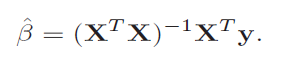

In [97]:
# should produce an error 
x_transpose = np.transpose(X_train.values)
xT_x = np.matmul(x_transpose , X_train.values)
inverse_xT_x = np.linalg.inv(xT_x)
optimum_coefficients = np.matmul((np.matmul(inverse_xT_x, x_transpose)), y_train.values)

LinAlgError: Singular matrix

### Treating the previous error using the Singular Value Decomposition to calculate the pseudo-inverse of the data matrix
optimal coefficients = image.png

In [ ]:
# calculating the economy svd (where the u matrix has the same size as the data matrix X, nad the sigma matrix is square matrix)
# AKA: no silent vectors in the u Matrix, so it is not square and not orthogonal (uTu = I, but uuT is != I)
def linear_reg_SVD(X, Y, zero_threshold = 1e-13):
  u, s, vT = np.linalg.svd(X, full_matrices= False)

  # Now initialize the "pseudo-"inverse of Sigma, where "pseudo" means "don't divide by zero"
  sigma_pseudo_inverse = np.zeros((vT.shape[0], vT.shape[0]))

  ## getting the index of the first approximately zero singular value
  idx_nearly_zero_sigma= np.where(s <= zero_threshold)[0][0]

  # 1/non-zero diagonal elements calculation
  sigma_pseudo_inverse[:idx_nearly_zero_sigma,:idx_nearly_zero_sigma] = np.diag(1/s[ :idx_nearly_zero_sigma])
  #the above three lines could have been calculated via:
  # sigma_pseudo_inverse = = np.linalg.pinv(np.diag(s), rcond=1e-13)

  # calculating the optimal coefficients
  optimal_coefficients = vT.T.dot(sigma_pseudo_inverse).dot(u.T).dot(Y)
  return optimal_coefficients

In [ ]:
optimal_coefficients = linear_reg_SVD(X_train, y_train, zero_threshold = 1e-13)
y_hat_from_scratch = X_train.values.dot(optimal_coefficients)

### Comparing our output to the implemented solution in sklearn (which is calculated using the pseudo inverse of train data as we did above)

In [ ]:
## trying the linear regression of sklearn with closed form solution approximated with the SVD as well
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_hat_sklearn = reg.predict(X_train)

In [ ]:
y_hat_sklearn

array([[ 2.89960791e-01],
       [ 4.73662368e-01],
       [ 3.88082449e-01],
       [ 6.56668837e-01],
       [ 2.30202062e-01],
       [ 6.70066081e-01],
       [ 4.45593438e-01],
       [ 3.40555553e-01],
       [ 4.71484403e-01],
       [ 4.22448173e-01],
       [ 4.83586766e-01],
       [ 1.42402040e-01],
       [ 2.95006400e-01],
       [ 4.85306611e-01],
       [ 2.21803340e-01],
       [ 4.34404201e-01],
       [ 6.23603405e-01],
       [ 4.81931428e-01],
       [-4.10828857e-02],
       [ 5.05645959e-01],
       [ 5.32043334e-01],
       [ 2.01632244e-01],
       [ 3.12444079e-01],
       [ 3.38125144e-01],
       [ 6.57547517e-01],
       [ 2.53466368e-01],
       [ 5.85571764e-01],
       [ 4.19042615e-01],
       [ 4.79621456e-01],
       [ 2.82799930e-01],
       [ 7.60784477e-01],
       [ 5.09496216e-01],
       [ 2.83329803e-01],
       [ 2.62395915e-01],
       [-9.71445147e-16],
       [ 3.67982522e-01],
       [ 4.89132098e-01],
       [ 3.07015701e-01],
       [ 3.2

In [ ]:
y_hat_from_scratch

array([[ 2.89960791e-01],
       [ 4.73662368e-01],
       [ 3.88082449e-01],
       [ 6.56668837e-01],
       [ 2.30202062e-01],
       [ 6.70066081e-01],
       [ 4.45593438e-01],
       [ 3.40555553e-01],
       [ 4.71484403e-01],
       [ 4.22448173e-01],
       [ 4.83586766e-01],
       [ 1.42402040e-01],
       [ 2.95006400e-01],
       [ 4.85306611e-01],
       [ 2.21803340e-01],
       [ 4.34404201e-01],
       [ 6.23603405e-01],
       [ 4.81931428e-01],
       [-4.10828857e-02],
       [ 5.05645959e-01],
       [ 5.32043334e-01],
       [ 2.01632244e-01],
       [ 3.12444079e-01],
       [ 3.38125144e-01],
       [ 6.57547517e-01],
       [ 2.53466368e-01],
       [ 5.85571764e-01],
       [ 4.19042615e-01],
       [ 4.79621456e-01],
       [ 2.82799930e-01],
       [ 7.60784477e-01],
       [ 5.09496216e-01],
       [ 2.83329803e-01],
       [ 2.62395915e-01],
       [ 5.10702591e-15],
       [ 3.67982522e-01],
       [ 4.89132098e-01],
       [ 3.07015701e-01],
       [ 3.2

## Evaluating our linear regression model

In [ ]:
def mse(actual, predicted):
  return np.mean(np.square(actual-predicted))

def rmse(actual, predicted):
  return np.sqrt(np.mean(np.square(actual-predicted)))

def mae(actual, predicted):
  return np.mean(np.abs(actual-predicted))

def mape(actual, predicted, epsilon = 0.0001):
  return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100

def rae(actual, predicted):
  numerator = np.sum(np.abs(predicted - actual))
  denominator = np.sum(np.abs(np.mean(actual) - actual))
  return numerator / denominator

def r_squared(actual, predicted):
  sse = np.sum(np.square(actual-predicted))
  sst = np.sum(np.square(actual-np.mean(actual)))
  return 1 - (sse/sst)

def adj_r_squared(X, actual, predicted): 
  r_squ = r_squared(actual, predicted)
  first_term = 1 - r_squ
  sec_term = (len(actual)-1)/(len(actual) - X.shape[1] - 1)
  return 1 - (first_term * sec_term)

In [ ]:
print('The mean squared error is: ', mse(y_train, y_hat_sklearn))
print('the root mean squard error is: ', rmse(y_train, y_hat_sklearn))
print('The mean absolute error is: ', mae(y_train, y_hat_sklearn))
print('The mean absolute perentage error is: ', mape(y_train, y_hat_sklearn))
print('The relative absolute error is: ', rae(y_train, y_hat_sklearn))
print('The coefficient of determination is: ', r_squared(y_train, y_hat_sklearn))
print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_hat_sklearn))

The mean squared error is:  0.0018507560520282446
the root mean squard error is:  0.04302041436374416
The mean absolute error is:  0.029599343802254537
The mean absolute perentage error is:  10.797139606811271
The relative absolute error is:  SalePrice    0.228594
dtype: float64
The coefficient of determination is:  SalePrice    0.928405
dtype: float64
The adjusted coefficient of determination is:  SalePrice    0.906141
dtype: float64


c:\Users\M.Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## Removing the multi-collinearity from the data before performing backward-stepwise selection of features 

### A naive approach which removes all the features with high VIF at once (not the desired approach, just made it for illustration)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF_Calculation(X_train):
  vif_data = pd.DataFrame()
  vif_data["feature"] = X_train.columns
    
  vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                            for i in range(len(X_train.columns))]
    
  return vif_data

In [ ]:
vif_data = VIF_Calculation(X_train)

c:\Users\M.Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\M.Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
# if we used this approach we would have dropped 98 columns from the model without making attention that if 2 features are redundant,
# we need to drop only one of them not both!
len(vif_data[vif_data['VIF'] > 20])

98

### Removing the features with very high VIF successively

In [ ]:
feats_high_vif_to_be_dropped = []
cleaned_df_from_multi_coll = X_train
num_cols_removed = 0
for origin_df_feat_index in range(len(X_train.columns)):
  num_cols_removed = X_train.shape[1] - cleaned_df_from_multi_coll.shape[1]
  cleaned_df_feat_index = origin_df_feat_index - num_cols_removed
  VIF_FEAT = variance_inflation_factor(cleaned_df_from_multi_coll.values, cleaned_df_feat_index)
  if VIF_FEAT > 20:
    feats_high_vif_to_be_dropped.append(cleaned_df_from_multi_coll.columns[cleaned_df_feat_index])
    cleaned_df_from_multi_coll = cleaned_df_from_multi_coll.drop(columns = [cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]])

In [ ]:
cleaned_df_from_multi_coll.shape

(1003, 98)

In [ ]:
feats_high_vif_to_be_dropped

## Having cleaned our training data from multi-collinearity, we can measure the significance level of each feature and perform subset selection using the backward-stepwise method

In [ ]:
## interpreting the summary table
LRresult = OLS(y_train,cleaned_df_from_multi_coll).fit().summary()

In [ ]:
from statsmodels.api import OLS
LRresult = OLS(y_train,cleaned_df_from_multi_coll).fit().summary2().tables[1]
# LRresult = LRresult.reset_index().rename(columns = {'index' : 'feature_name'})
LRresult

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
BsmtUnfSF,0.055110,0.015584,3.536217,0.000426,0.024524,0.085696
MoSold,0.004757,0.006137,0.775215,0.438415,-0.007286,0.016801
OpenPorchSF,0.007552,0.005304,1.423698,0.154878,-0.002858,0.017961
Mitchel,-0.045348,0.013274,-3.416256,0.000663,-0.071400,-0.019296
BsmtQual,-0.000427,0.002537,-0.168308,0.866379,-0.005405,0.004551
...,...,...,...,...,...,...
Brk Cmn,0.041796,0.026593,1.571699,0.116369,-0.010395,0.093986
Gambrel,0.034086,0.018885,1.804927,0.071418,-0.002977,0.071150
Blmngtn,0.025255,0.019989,1.263435,0.206758,-0.013976,0.064486
WoodDeckSF,0.007824,0.004383,1.784928,0.074607,-0.000779,0.016427


In [ ]:
significant_feats_df = cleaned_df_from_multi_coll
LRresult = (OLS(y_train,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})
insignificant_feats_ls = []
# if the results contain an insignificant feature (a feature with p-value > 0.05), 
# then we can drop it form the model and re-calculate the summary table
while LRresult['P>|t|'].max() > 0.05:
  # get the feature with the max p-value (the least significance for the model)
  insignificant_feat = LRresult[LRresult['P>|t|'] == LRresult['P>|t|'].max()][['feature_name']].values[0, 0]
  insignificant_feats_ls.append(insignificant_feat)
  significant_feats_df = significant_feats_df.drop(columns = [insignificant_feat])
  LRresult = (OLS(y_train,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})

In [ ]:
len(insignificant_feats_ls)

49

### Measuring the whole model significance using the F-statistic,  and re-evaluating the model after the subset-selection

In [ ]:
 LRresult = OLS(y_train,significant_feats_df).fit().summary().tables[0]
 LRresult

Dep. Variable:,SalePrice,R-squared (uncentered):,0.994
Model:,OLS,Adj. R-squared (uncentered):,0.994
Method:,Least Squares,F-statistic:,3784.
Date:,"Fri, 15 Apr 2022",Prob (F-statistic):,0.00
Time:,07:19:18,Log-Likelihood:,1696.7
No. Observations:,1003,AIC:,-3311.
Df Residuals:,962,BIC:,-3110.
Df Model:,41,,
Covariance Type:,nonrobust,,


## Using Shrinkage methods (Ridge, Lasso and Elastic Net) to decrease the variance of the model while sacrificing a little of bias

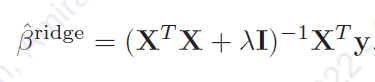
### The above formula can be used for determining the coefficients of ridge regression (but without bias)

In [ ]:
lambda_ = 0.0001
ridge_coeffs = (np.linalg.inv(X_train.T.dot(X_train) +
               (lambda_ * np.identity(X_train.shape[1])))).dot(X_train.T.dot(y_train))

In [ ]:
y_ridge_from_scratch = X_train.values.dot(ridge_coeffs)

In [ ]:
y_ridge_from_scratch

array([[0.52769334],
       [0.4275953 ],
       [0.34002327],
       ...,
       [0.68671429],
       [0.58135928],
       [0.61205984]])

In [ ]:
from sklearn.linear_model import Ridge
sklearn_ridge = Ridge(alpha = 0.0001, fit_intercept=False)
sklearn_ridge.fit(X_train, y_train)
y_ridge_sklearn = sklearn_ridge.predict(X_train)
y_ridge_sklearn

array([[0.52769334],
       [0.4275953 ],
       [0.34002327],
       ...,
       [0.68671429],
       [0.58135928],
       [0.61205984]])

## Checking the linear regression model assumptions

Plot of the residuals versus the fitted values. 
The plot should show a random scatter of points above and below the zero
line if E(residuals) = 0 and no fanning out/in pattern if constant variance
hold (homoskedasticity) [Assumptions 1 & 2]

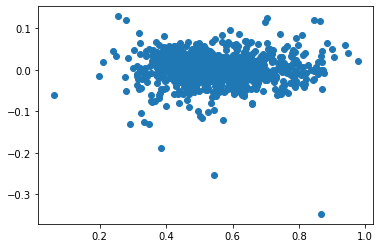

In [ ]:
import matplotlib.pyplot as plt
residuals = y_train - y_hat_sklearn
# the linear regression model without any regularization or subset selection
plt.scatter(y_hat_sklearn, residuals)
plt.show()
# we can see from the plot that there is no fanning in or out
# therefore, (homoskedasticity/ constant variance) condition hold

# we can also see that the residuals follow a random pattern above and below the zero line horizontally
# so the average of the residuals is nealry zero

In [ ]:
(residuals).mean()

SalePrice    0.000022
dtype: float64

Use Histograms or normal probability plots (Q-Q plot) of residuals.
Ideally, the histogram should be bell-shaped & the points in Q-Q plot should lie on a straight diagonal line if normality holds. [Assumption 3]

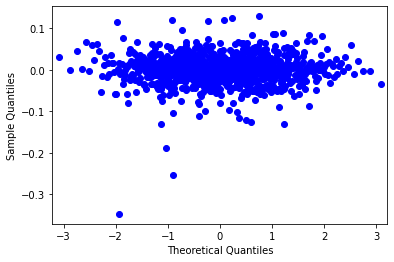

In [ ]:
## checking the normality of residuals
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot 
fig = sm.qqplot(residuals, fit = False )
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f299987b190>]],
      dtype=object)

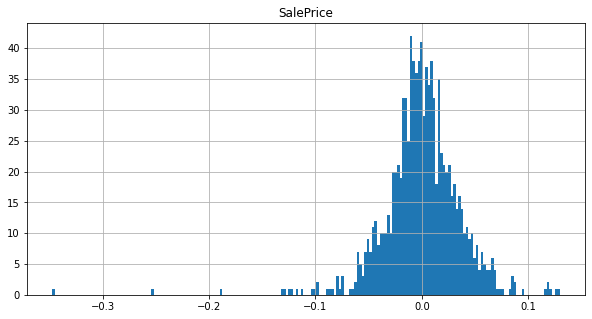

In [ ]:
residuals.hist(bins = 200, figsize = (10, 5))

## Basis expansion of the input data to get a polynomial representation which might result in better overall model results 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)

poly_feats_linear_reg = LinearRegression()
poly_feats_linear_reg.fit(X_poly, y_train)

LinearRegression()

In [ ]:
poly_preds = poly_feats_linear_reg.predict(X_poly)

In [ ]:
mse(y_train, poly_preds)

SalePrice    2.870984e-31
dtype: float64